In [1]:
import struct
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib.backends.backend_pdf import PdfPages
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from PIL import Image
from numpy import matlib
C=np.load('C.npy')
X=np.load('check.npy')
train_images=np.load('train_images.npy')
train_labels=np.load('train_labels.npy')
random_numbers=np.load('random_numbers.npy')

In [2]:
def FindMinByC(C,percent,p):
    [M,N]=np.array(C).shape
    norms = np.zeros(N)  # 存储列向量的q范数
    indices = np.arange(N)  # 列向量的索引
    top_k_indices = []  # 选择的列向量的索引
    for j in range(N):
        norm_vector=[x for x in C[:, j] ]
        norms[j] = np.linalg.norm(norm_vector, ord=p)
        if norms[j]>0.3:
            top_k_indices.append(j)
        #print("范数，根据范数从小到大选择",norms[j])
    # 根据列向量的q范数排序
    sorted_indices = np.argsort(norms)[::-1]
    # 选择排序后的前k个向量的索引
    top_k_indices1 = sorted_indices[:int(len(norms)*percent)]
    return top_k_indices1

In [3]:
import numpy as np

def simple_scatterplot(ax, X, labels, selected):
    tsne = TSNE(n_components=2, random_state=42, method='barnes_hut')
    X = tsne.fit_transform(X)
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))
    label_list=[]
    for label_index in range(len(labels)):
        if labels[label_index]==5:
            label_list.append(label_index)
        if label_index in selected:
            ax.scatter(X[label_index, 0], X[label_index, 1], s=80, color=colors(labels[label_index]),marker='*', edgecolors='black')
            ax.text(X[label_index, 0], X[label_index, 1], str(label_index), fontsize=7)
        else:
            ax.scatter(X[label_index, 0], X[label_index, 1], s=8, color=colors(labels[label_index]))
    X2=X[label_list]
    centr=X2.mean(axis=0)
    distances = np.linalg.norm(X2 - centr, axis=1)
    # 获取按距离中心点大小排序的索引（从大到小）
    sorted_indices = np.argsort(distances)[::-1]
    label_list = [label_list[i] for i in sorted_indices]
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_facecolor((241/255, 241/255, 246/255))
    for spine in ax.spines.values():
        spine.set_edgecolor((159/255, 158/255, 180/255))
    ax.legend()
    return label_list

In [4]:
#如何根据数据点计算C矩阵
def calculate_C(Y,combination):
    [M,N]=np.shape(Y)
    C=np.zeros((N,N))
    matrix = np.zeros((len(combination)+1, len(combination)+1))
    b_matrix=np.zeros((len(combination)+1,1))
    for idx in range(N):
        for i in range(len(combination)):#一共len(combination)个方程
            for j in range(len(combination)):#每个方程有len(combination)个变量
                matrix[i][j]=2*np.dot(Y[:,combination[i]],Y[:,combination[j]])
            matrix[i][len(combination)]=1
            b_matrix[i]=2*np.dot(Y[:,combination[i]],Y[:,idx])
        for j in range(len(combination)):
            matrix[len(combination)][j]=1
        matrix[len(combination)][len(combination)]=0
        b_matrix[len(combination)]=1
        regularized_matrix = matrix + 1e-8 * np.eye(matrix.shape[0])
        answer = np.linalg.solve(regularized_matrix, b_matrix)
        for i in range(len(combination)):
            C[combination[i]][idx]=answer[i]           
    return  C

## 1.展示加入顺序

[262 147  62 231 259 186 362 265 355 299  80 272 281 304 188 284 469 473
 193  19 359 459  53 428]
371.3910584103557
0.19510018446116045
[2, 1, 4, 2, 2, 5, 3, 3, 1, 1]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[440, 495, 316, 480, 365, 355, 281, 158, 462, 382, 193, 390, 231, 265, 200, 244, 138, 455, 277, 337, 218, 339, 89, 85, 343, 369, 175, 499, 67, 126, 289, 306, 326, 177, 232, 132, 167, 354, 430, 395, 84, 460, 387, 401, 477, 29, 23, 141, 172, 149]


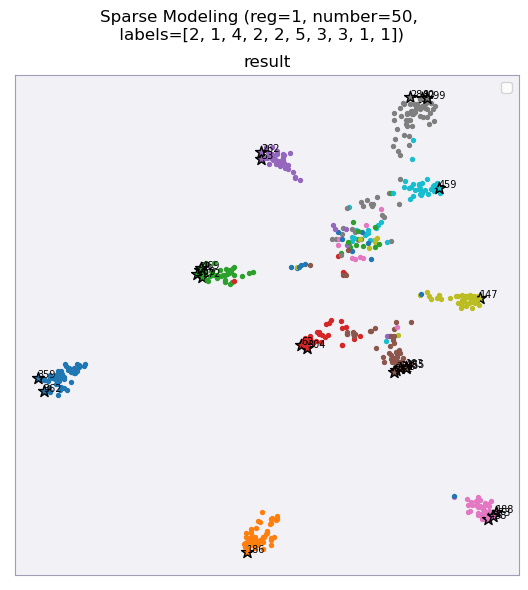

In [29]:
C= np.load('C.npy')
test_num=24
result=FindMinByC(C,test_num/500,np.inf)
print(result)
loss=100*np.linalg.norm(C,ord=np.inf)+0.5*np.linalg.norm(X.T-np.dot(X.T,C),ord='fro')
print(loss)
target=np.linalg.norm(X.T-np.dot(X.T,C),ord='fro')
print(target)
labels = [0] * 10
for index in result:
    labels[train_labels[index]] += 1
print(labels)
fig, axes = plt.subplots(1, 1, figsize=(6.5, 6.5))
# Plot result on the subplot
SAMple=simple_scatterplot(axes, X, train_labels[:1000], result)
print(SAMple)

axes.set_title('result')
# Set the title
fig.suptitle(f'Sparse Modeling (reg={1}, number={int(0.1*500)},\n labels={labels})')
plt.show()
np.save('result.npy',result)

262 19 -9 0.9999991903491889 0.9999991903491889
259 17 -9 0.9999991289187088 0.9999991289187088
186 31 -10 0.9999990944372817 0.9999990944372817
265 22 -8 0.9999990832861476 0.9999990832861476
147 23 -10 0.9999990570194726 0.9999990570194726
62 17 -9 0.999999053134233 0.999999053134233
362 30 -10 0.9999990299355445 0.9999990299355445
355 1 -8 0.9999990176407424 0.9999990176407424
231 20 -8 0.9999990111951447 0.9999990111951447
272 21 -9 0.9999989913884784 0.9999989913884784
281 20 -8 0.9999989595669271 0.9999989595669271
299 34 -11 0.9999989436194543 0.9999989436194543
284 32 -10 0.9999989072006022 0.9999989072006022
19 20 -9 0.999998893598762 0.999998893598762
469 18 -9 0.9999988814731186 0.9999988814731186


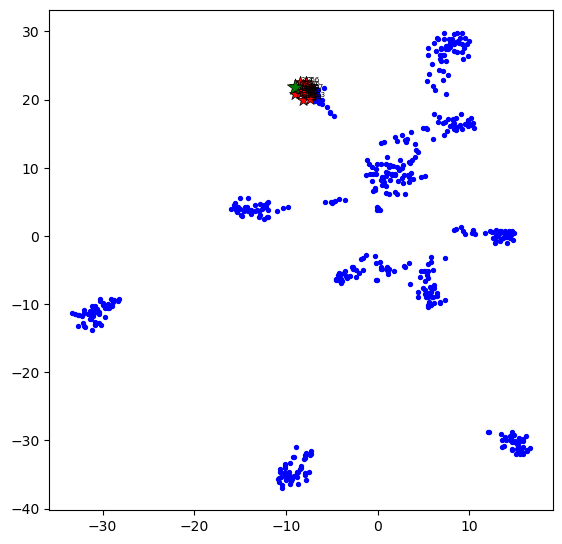

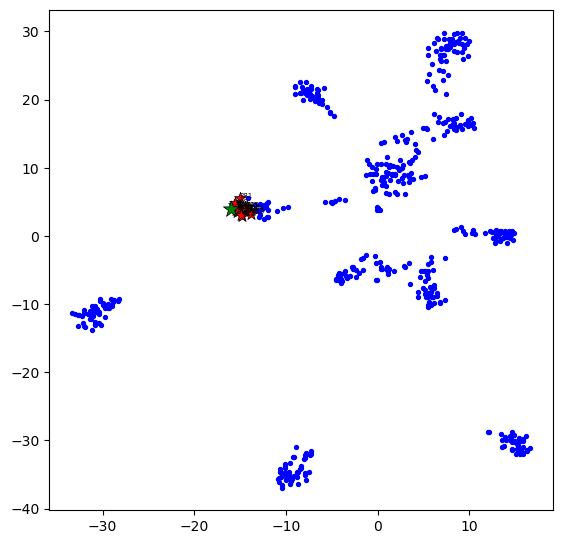

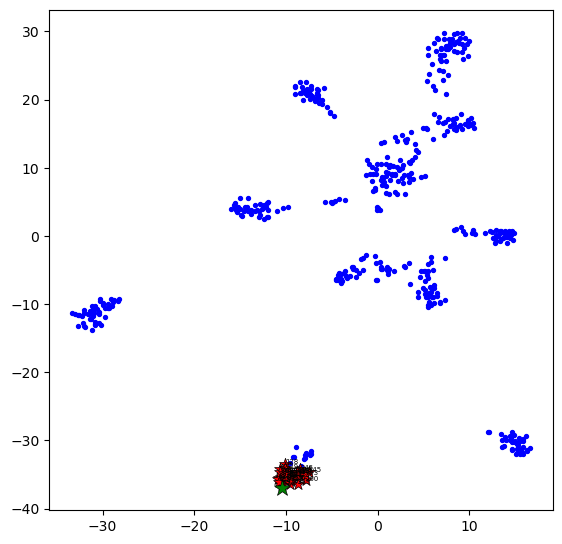

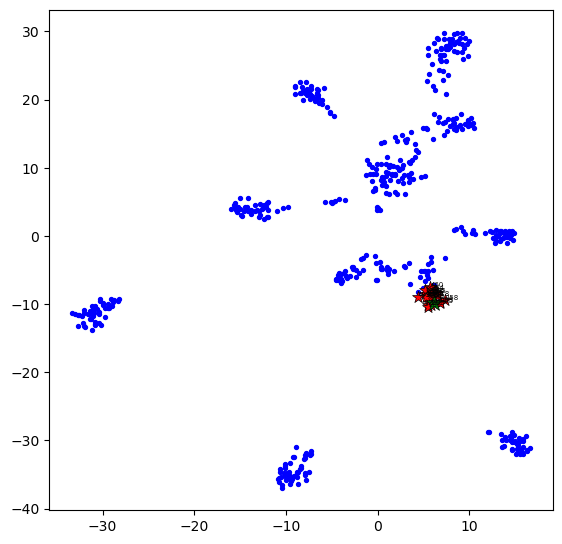

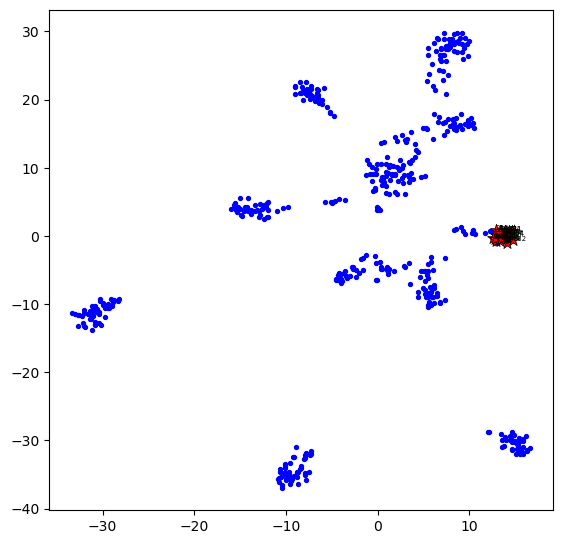

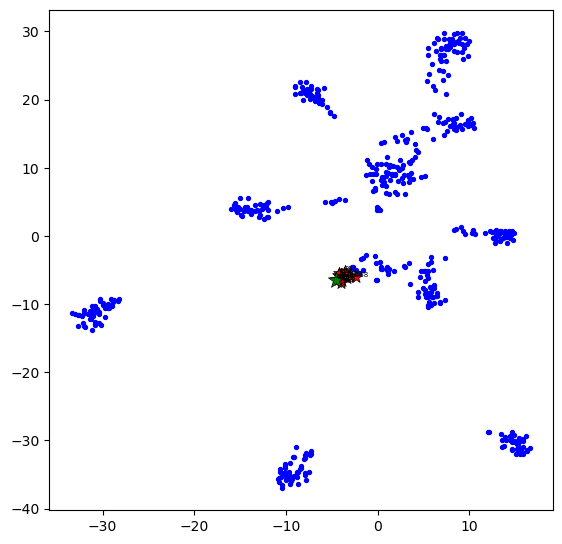

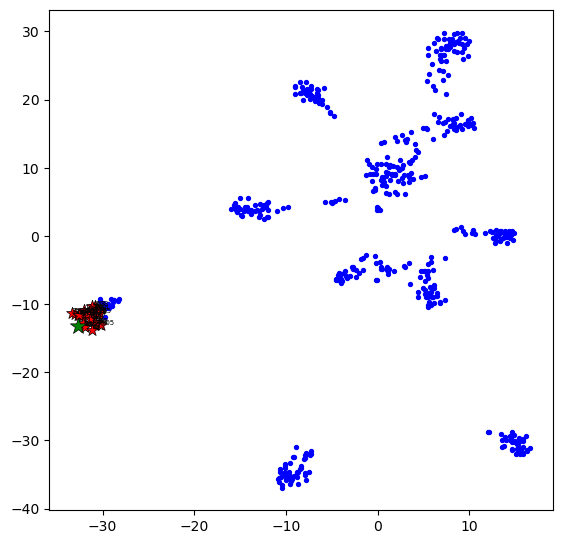

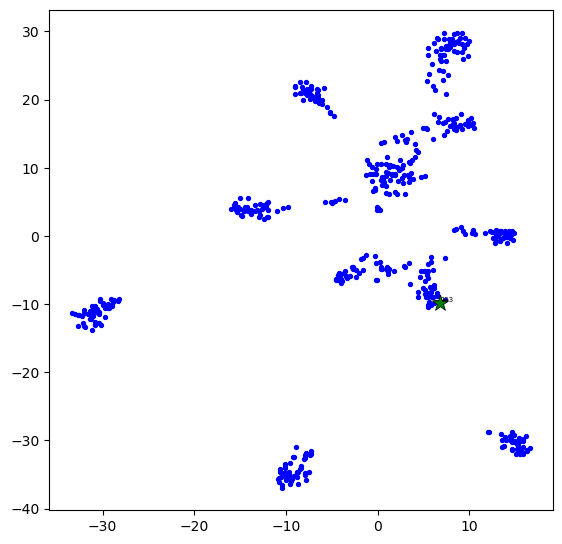

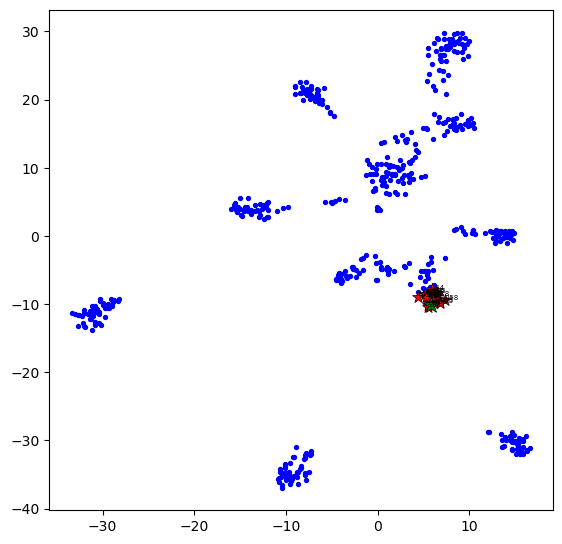

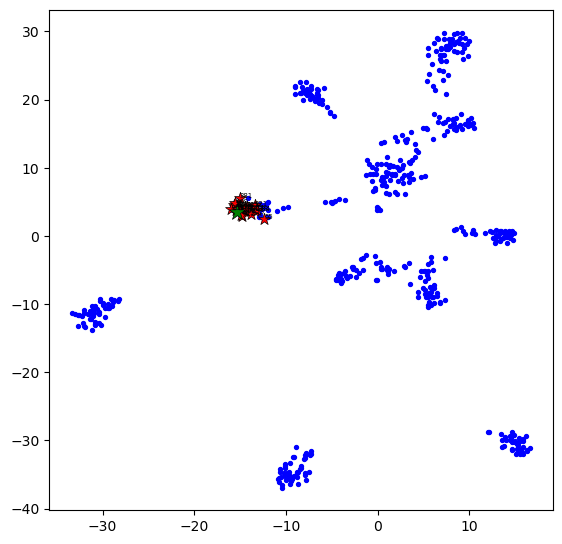

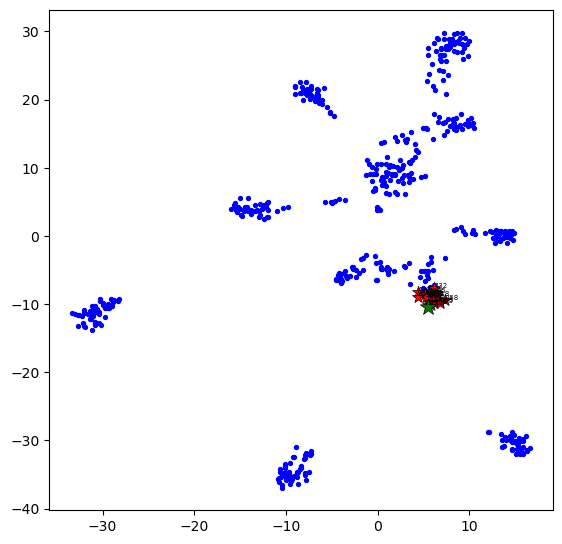

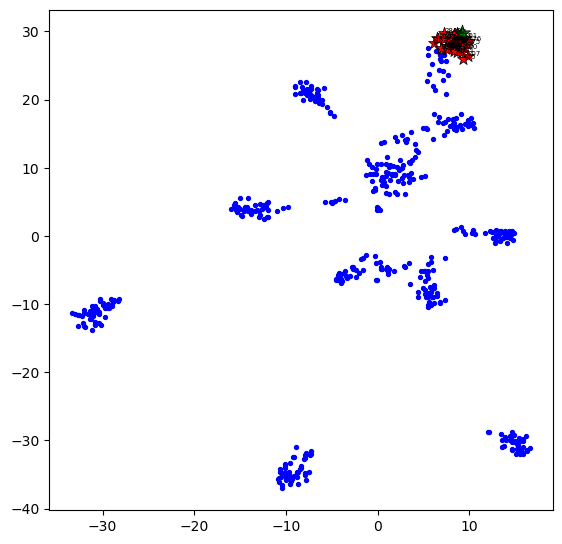

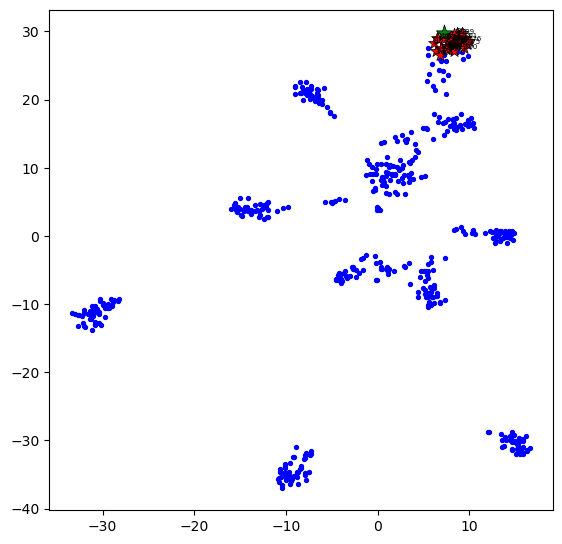

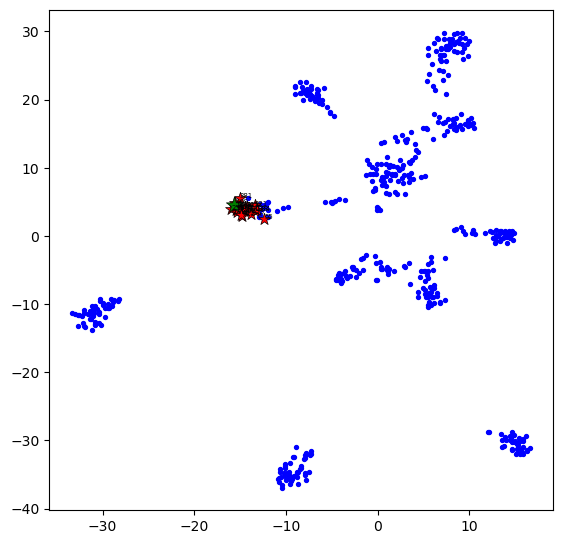

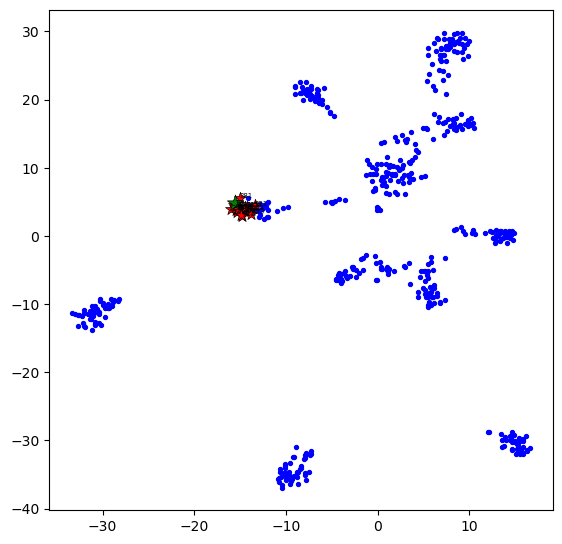

In [25]:
for index in result:
    max_magnitude = float('-inf')  # 初始化最大数量级
    max_magnitude_indices = []  # 初始化最大数量级的索引列表
    test_num=index
    vector=C[:,test_num]
    magnitude_indices = {}  # 创建一个字典来存储不同数量级的索引列表

    for i, num in enumerate(vector):
        magnitude = int(np.floor(np.log10(np.abs(num))))  # 计算数量级并转换为整数
        if magnitude == -1:
            if num>0.9:
                continue
        if magnitude in magnitude_indices:
            magnitude_indices[magnitude].append(i)
        else:
            magnitude_indices[magnitude] = [i]
    
    # 提取数量级相同的索引列表
    max_magnitude_indices = magnitude_indices[max(magnitude_indices.keys())]
    norm_vector=[x for x in vector ]
    print(index,len(max_magnitude_indices),magnitude,norm_vector[test_num],np.linalg.norm(norm_vector,ord=np.inf))
    tsne = TSNE(n_components=2, random_state=42, method='barnes_hut')
    X1 = tsne.fit_transform(X)
    fig,axes =plt.subplots(1, 1, figsize=(6.5, 6.5))

    axes.scatter(X1[:, 0], X1[:, 1], s=8, color='blue')
    axes.scatter(X1[max_magnitude_indices, 0], X1[max_magnitude_indices, 1], s=80, color='red',marker='*', edgecolors='black', linewidth=0.5)
    axes.scatter(X1[test_num, 0], X1[test_num, 1], s=150, color='green',marker='*', edgecolors='black', linewidth=0.5)
    for i in max_magnitude_indices:
        axes.text(X1[i, 0], X1[i, 1], i, fontsize=5, color='black')

## 加入粉色和蓝色的点

In [57]:
color='blue'
if color=='pink':
    #首先，将所有粉色的data都计算一遍target，然后按其对索引列表排序并输出
    pink_data=[465, 413, 433, 418, 2, 22, 338, 237, 25, 286, 428, 47, 330, 473, 457, 137, 297, 188, 340, 152, 402, 292, 375, 217, 336, 403, 93, 498, 442, 451, 144, 361, 189, 274, 434, 356, 52, 494, 249, 215, 268, 407, 397, 290, 398, 414]
    data=pink_data
else:
    data=[15, 235, 328, 415, 373, 279, 71, 36, 303, 28, 139, 61, 464, 41, 493, 444, 182, 459, 32, 463, 357, 385, 386, 109, 441, 199, 264, 70, 419, 111, 242, 435, 409, 49, 206, 280, 278, 228, 324, 406, 153, 213, 83, 246, 79, 133, 254, 0, 295]
target_list=[]
C_=calculate_C(X.T,result)
target1=np.linalg.norm(X.T-X.T.dot(C_),ord='fro')
for pink in data:
    result1=[x for x in result ]
    result1.append(pink)
    C1=calculate_C(X.T,result1)      
    target2=np.linalg.norm(X.T-X.T.dot(C1),ord='fro')
    target_list.append(target2)
# 使用zip将pink_data和target_list组合成元组的列表
combined_data = list(zip(data, target_list))

# 根据target_list的值进行排序
sorted_combined_data = sorted(combined_data, key=lambda x: x[1])

# 提取排序后的pink_data数组
sorted_data = [item[0] for item in sorted_combined_data]
sorted_target_list=[item[1] for item in sorted_combined_data]
#把target降低的和升高的data分别储存
down_data=[item[0] for item in sorted_combined_data if item[1]<=target1]
up_data=[item[0] for item in sorted_combined_data if item[1]>target1]
down_target_list=[item[1] for item in sorted_combined_data if item[1]<=target1]
up_target_list=[item[1] for item in sorted_combined_data if item[1]>target1]

KeyboardInterrupt: 

In [14]:
print(down_data)
selected_data=[71, 279, 15, 206, 386, 415, 79, 133, 213, 61]

[0, 242, 357, 246, 79, 295, 435, 199, 324, 133, 493, 279, 406, 49, 111, 415, 303, 213, 278, 373, 28, 153, 254, 235, 41, 61, 464]


71 4 -9 0.999996942969058
279 5 -5 0.20254514022840034
15 4 -8 0.9999939886038024
206 3 -6 0.3125677639397082
386 1 -9 0.9999957726288154
415 4 -9 0.9999263543631348
79 6 -9 0.9999968226203657
133 1 -9 0.9999931603561447
213 4 -9 0.9999882266793091
61 1 -10 0.9999964105923472


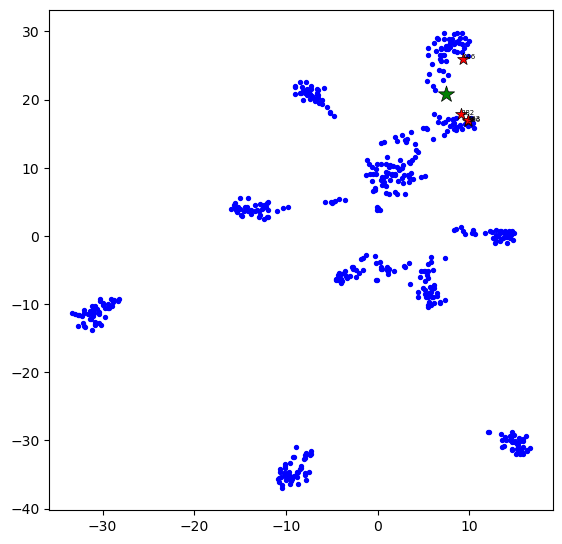

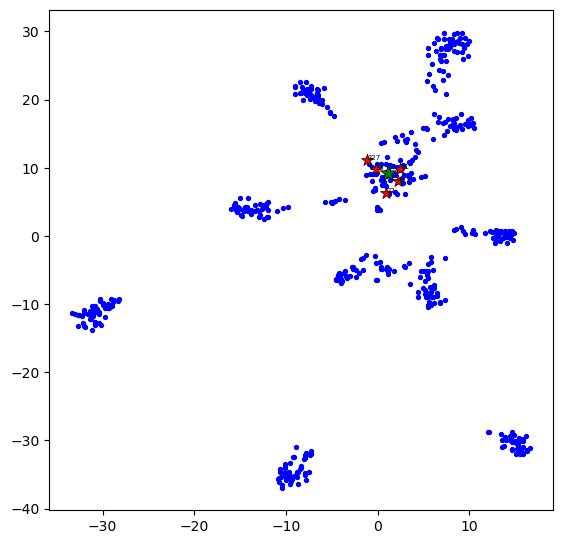

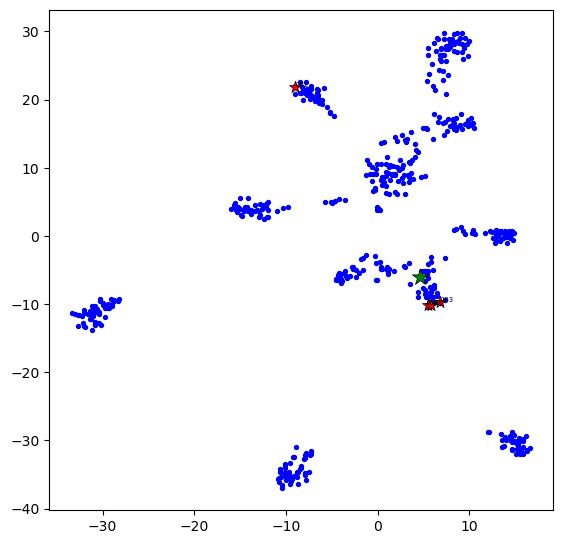

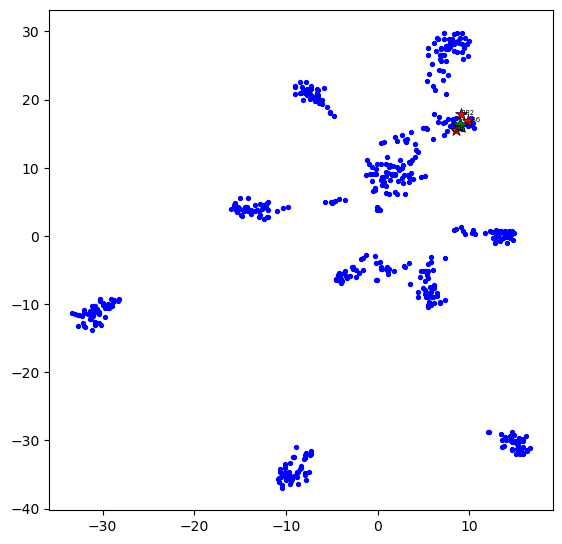

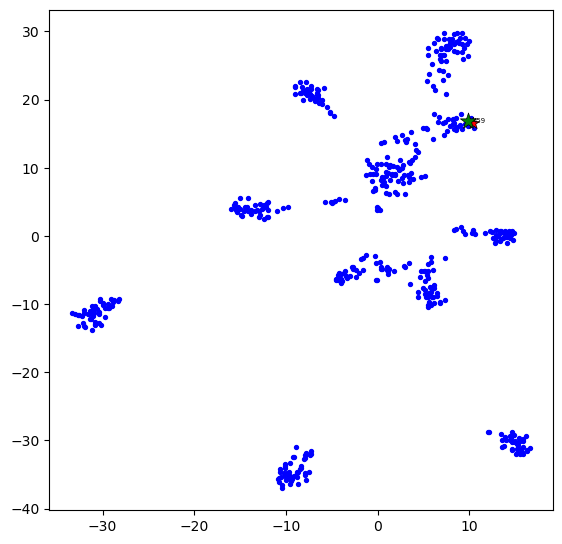

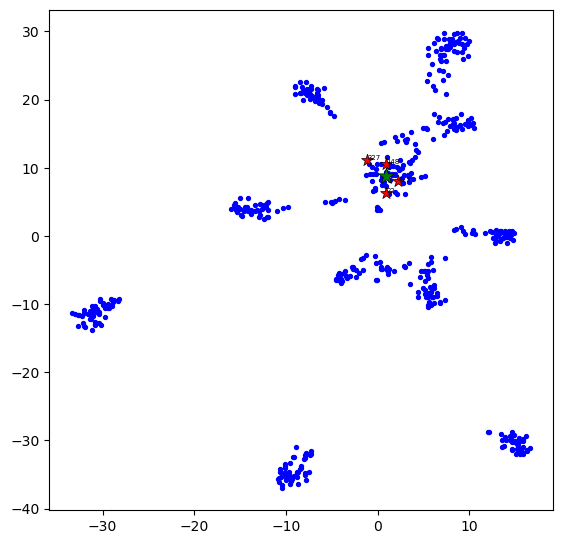

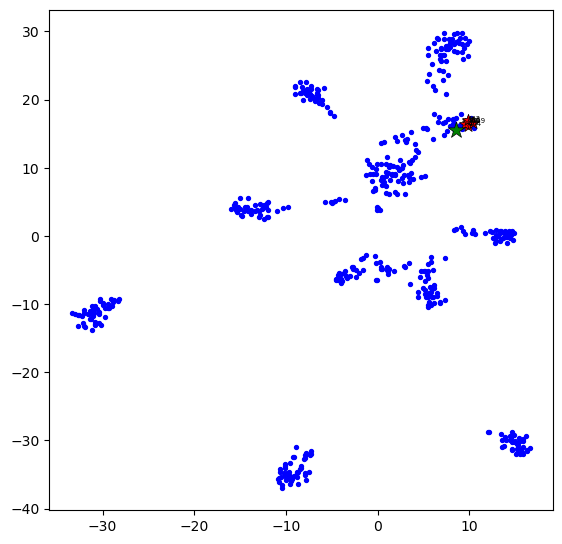

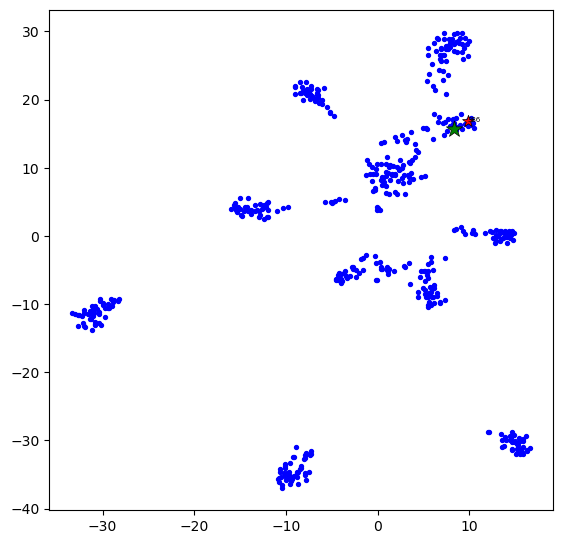

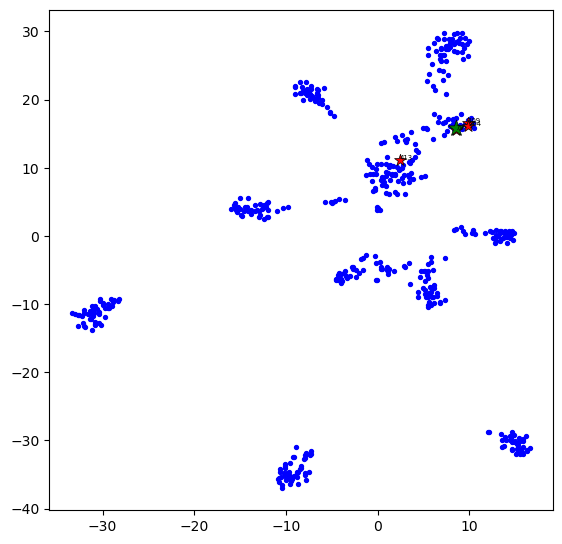

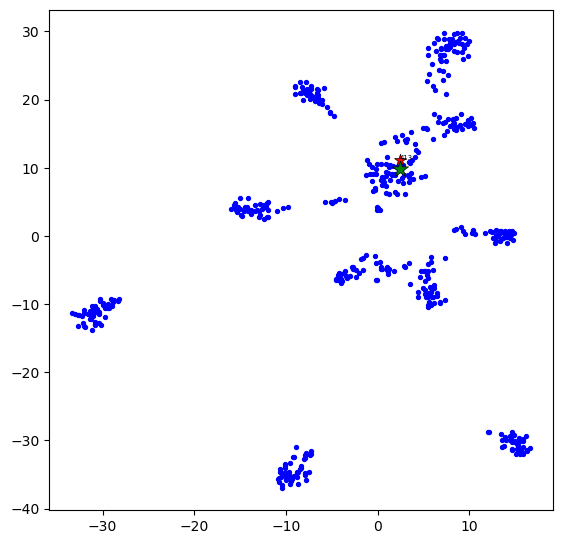

In [15]:
for index in selected_data:
    max_magnitude = float('-inf')  # 初始化最大数量级
    max_magnitude_indices = []  # 初始化最大数量级的索引列表
    test_num=index
    vector=C[:,test_num]
    magnitude_indices = {}  # 创建一个字典来存储不同数量级的索引列表

    for i, num in enumerate(vector):
        magnitude = int(np.floor(np.log10(np.abs(num))))  # 计算数量级并转换为整数
        if magnitude == -1:
            if num>0.9:
                continue
        if magnitude in magnitude_indices:
            magnitude_indices[magnitude].append(i)
        else:
            magnitude_indices[magnitude] = [i]
    
    # 提取数量级相同的索引列表
    max_magnitude_indices = magnitude_indices[max(magnitude_indices.keys())]
    norm_vector=[x for x in vector ]
    print(index,len(max_magnitude_indices),magnitude,np.linalg.norm(norm_vector,ord=np.inf))
    tsne = TSNE(n_components=2, random_state=42, method='barnes_hut')
    X1 = tsne.fit_transform(X)
    fig,axes =plt.subplots(1, 1, figsize=(6.5, 6.5))

    axes.scatter(X1[:, 0], X1[:, 1], s=8, color='blue')
    axes.scatter(X1[max_magnitude_indices, 0], X1[max_magnitude_indices, 1], s=80, color='red',marker='*', edgecolors='black', linewidth=0.5)
    axes.scatter(X1[test_num, 0], X1[test_num, 1], s=150, color='green',marker='*', edgecolors='black', linewidth=0.5)
    for i in max_magnitude_indices:
        axes.text(X1[i, 0], X1[i, 1], i, fontsize=5, color='black')

## 对C的一些观察

In [59]:
C=np.load('C.npy')
X=np.load('check.npy')
train_images=np.load('train_images.npy')
train_labels=np.load('train_labels.npy')
random_numbers=np.load('random_numbers.npy')

C:\Users\liuyi\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liuyi\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liuyi\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liuyi\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liuyi\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22823 (\

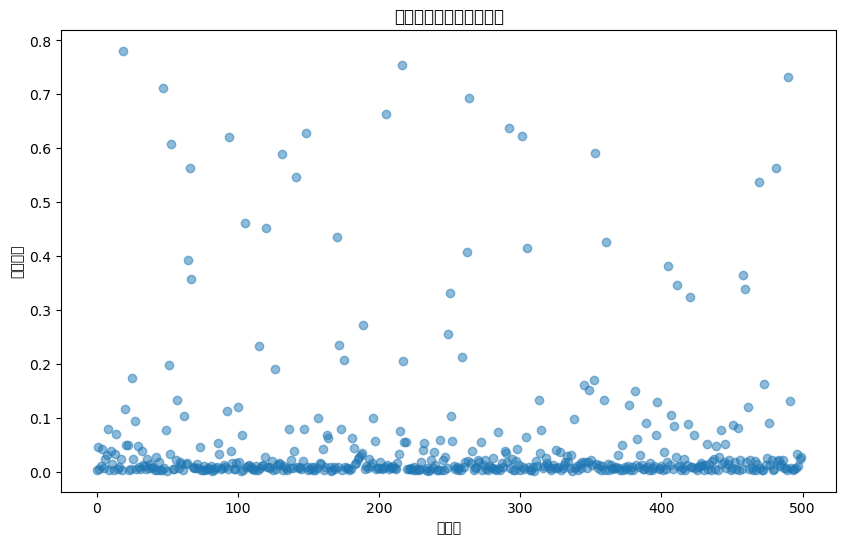

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


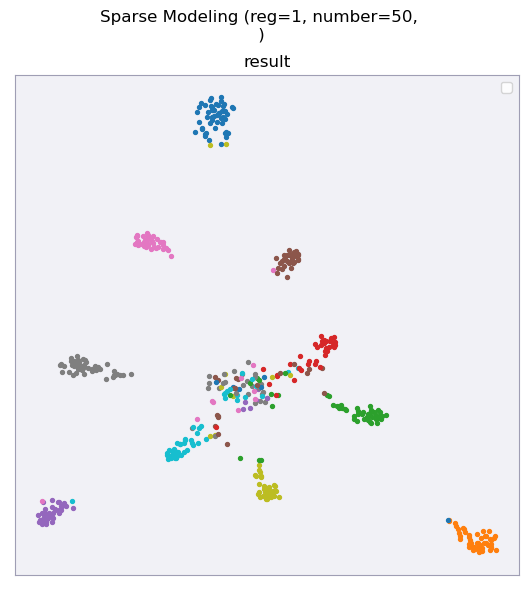

In [60]:
a=[]
data=[]
result=FindMinByC(C,0.1,np.inf)
count=0
for i in range(500):
    data.append(C[i][i])
# 绘制散点图
plt.figure(figsize=(10, 6))  # 设置图表大小
plt.scatter(range(500), data, alpha=0.5)  # alpha设置点的透明度，0为完全透明，1为完全不透明
plt.xlabel('数据点')
plt.ylabel('纵坐标值')
plt.title('数据点的大小分布散点图')
plt.show()
fig, axes = plt.subplots(1, 1, figsize=(6.5, 6.5))
# Plot result on the subplot
SAMple=simple_scatterplot(axes, X, train_labels[:1000], b)
axes.set_title('result')
# Set the title
fig.suptitle(f'Sparse Modeling (reg={1}, number={int(0.1*500)},\n )')
plt.show()

C:\Users\liuyi\AppData\Local\Temp\ipykernel_40176\783602031.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes =plt.subplots(1, 1, figsize=(6.5, 6.5))


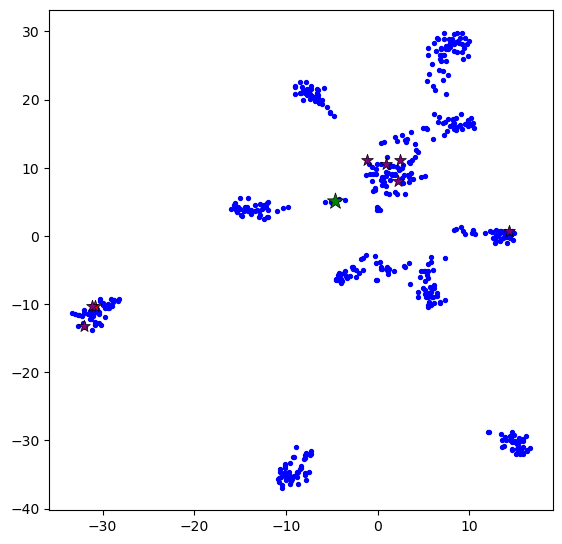

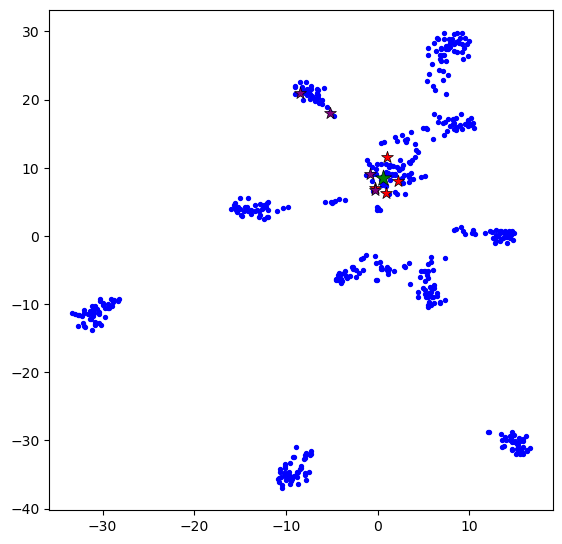

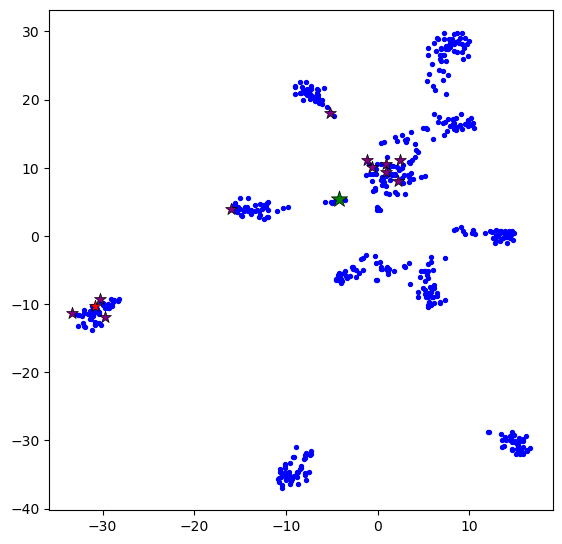

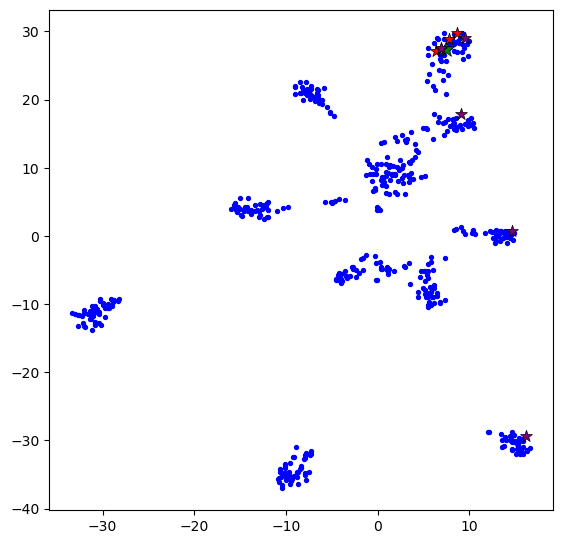

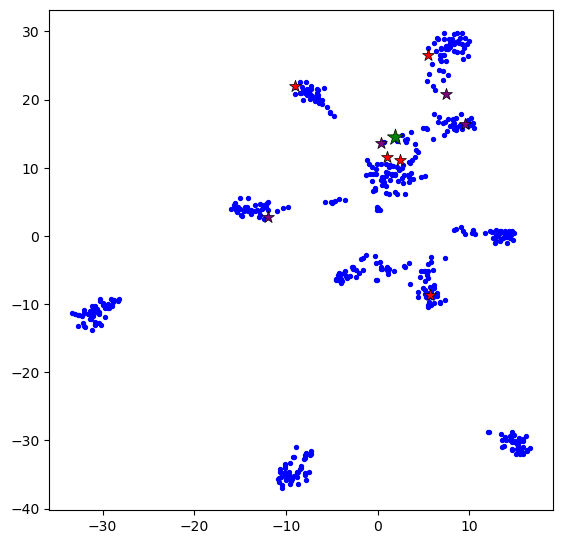

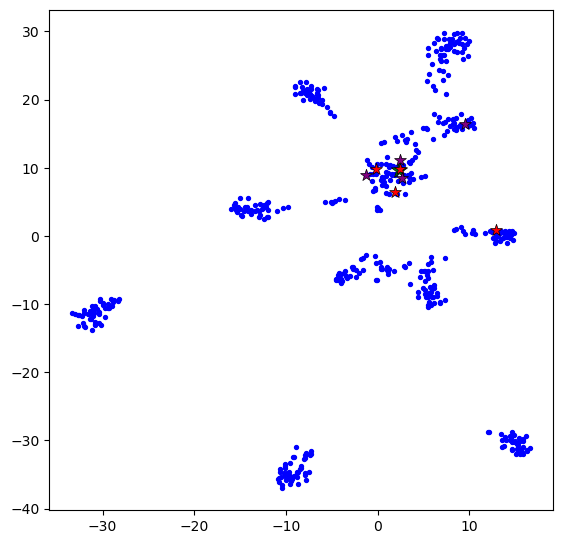

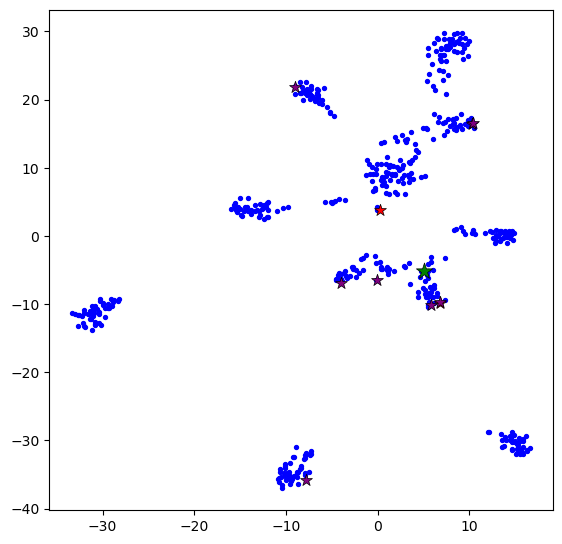

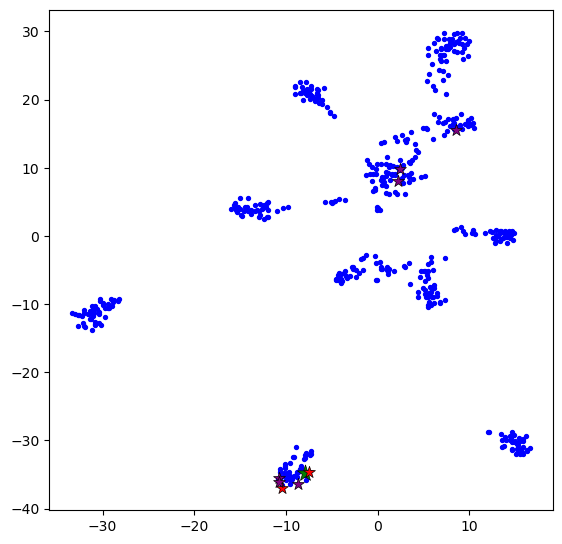

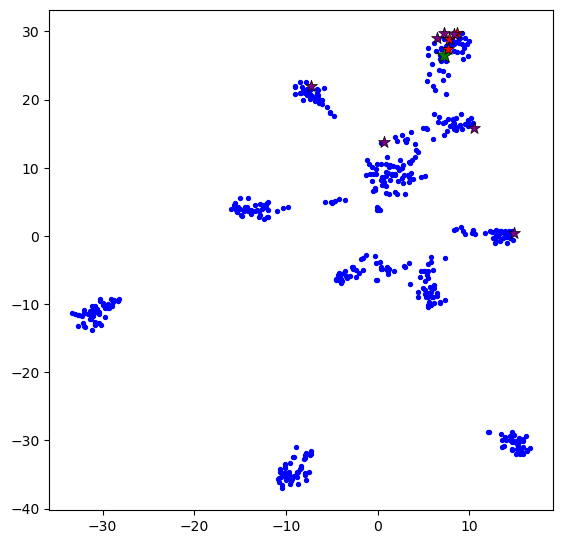

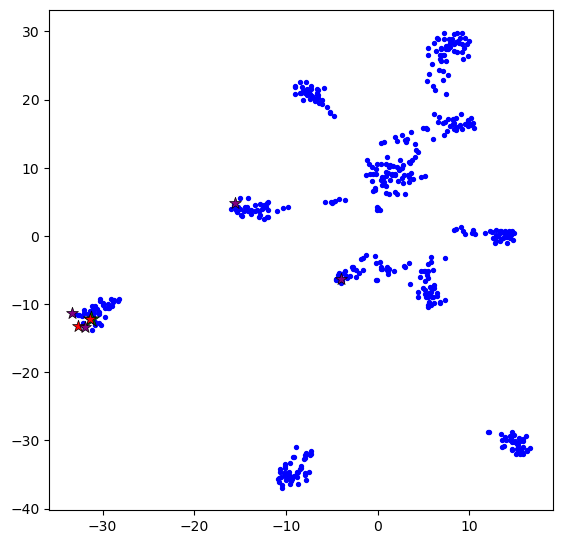

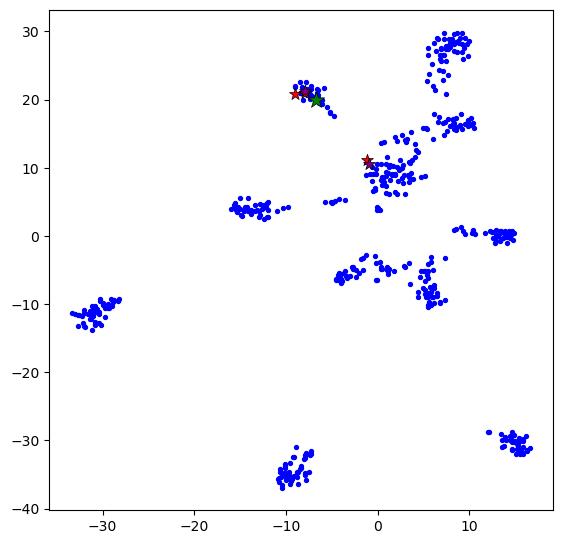

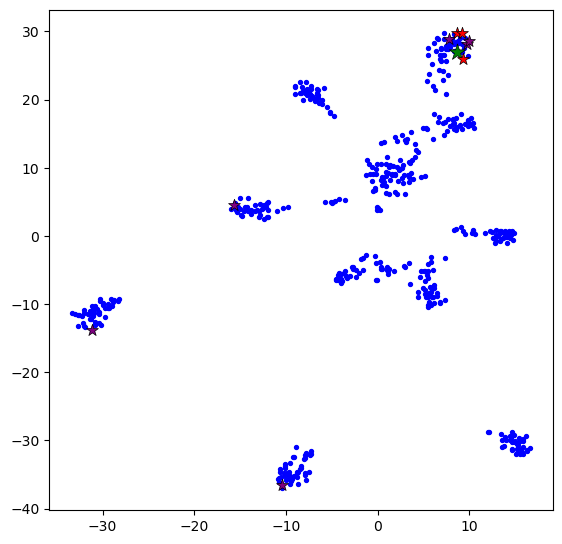

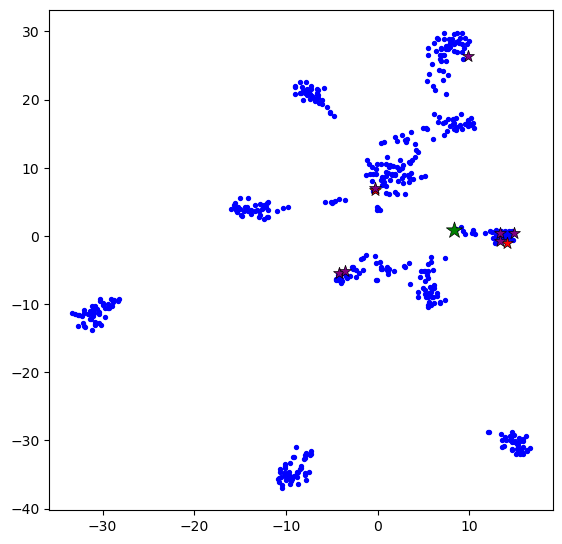

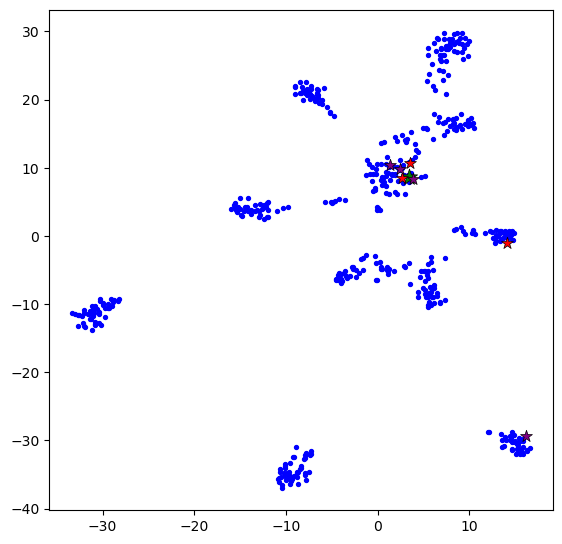

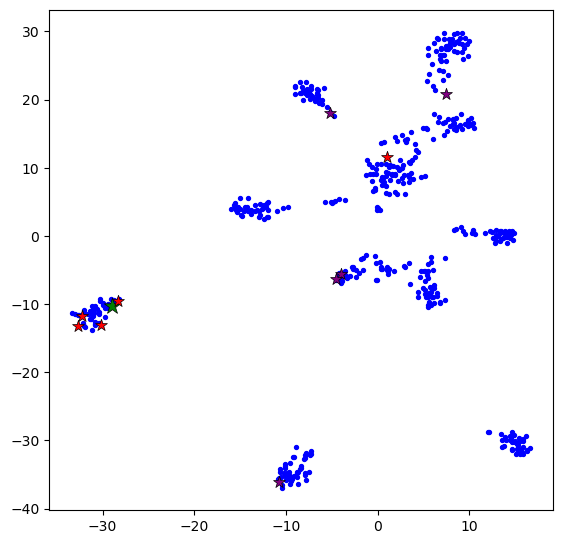

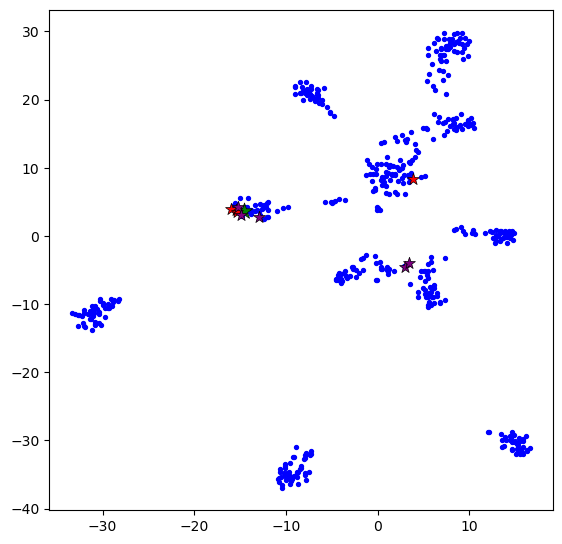

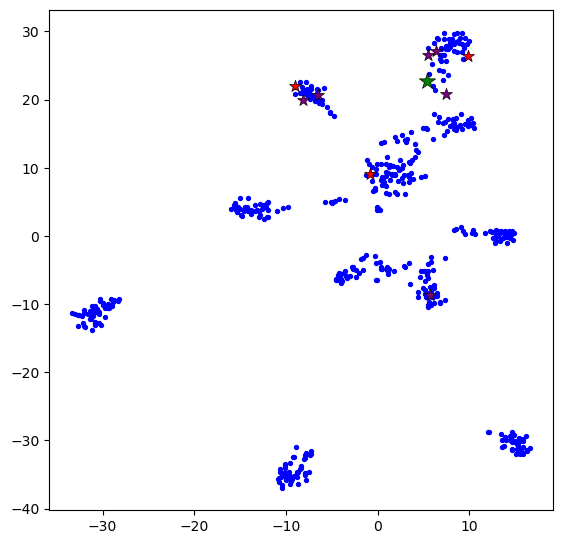

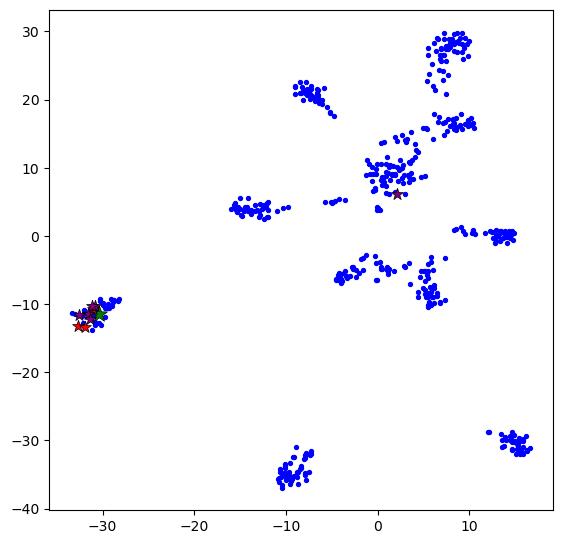

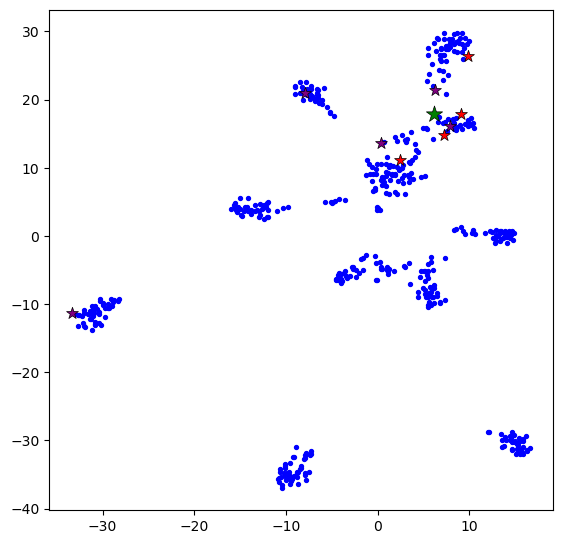

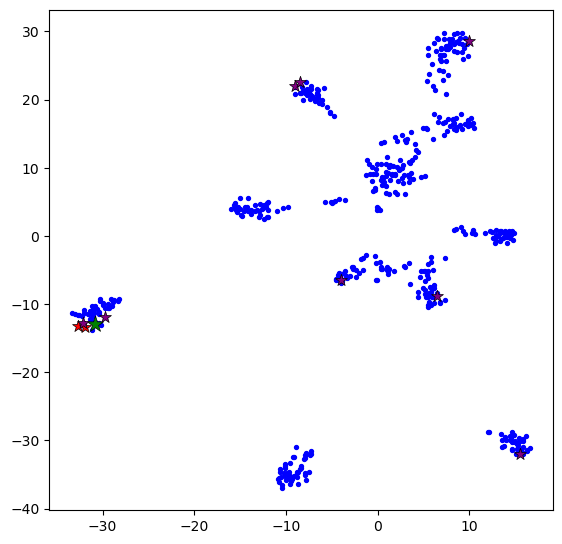

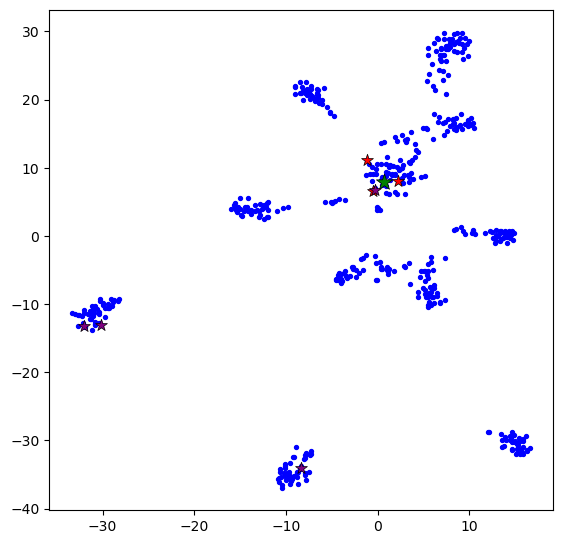

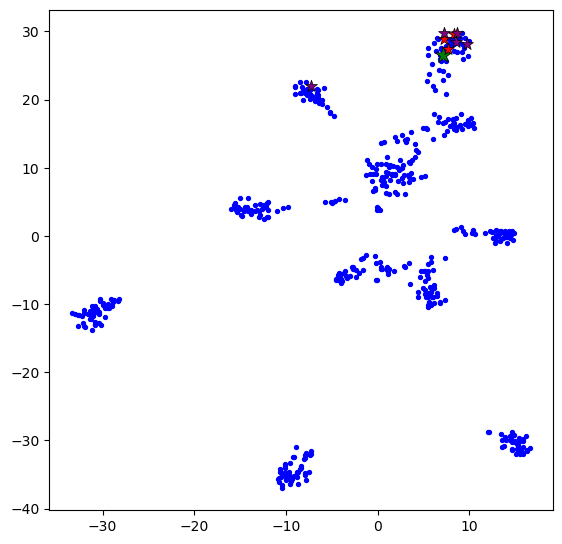

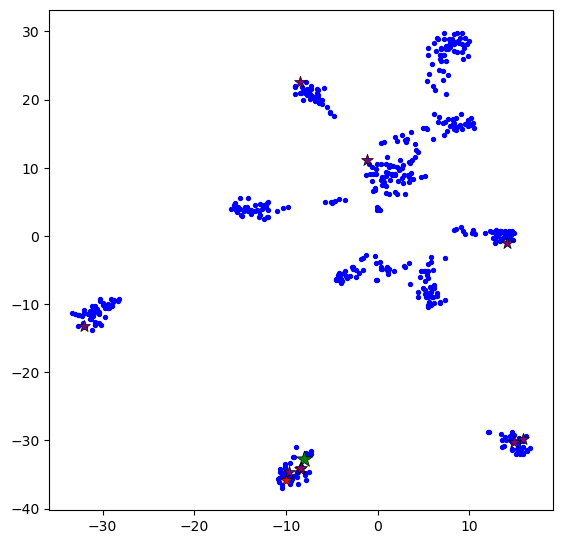

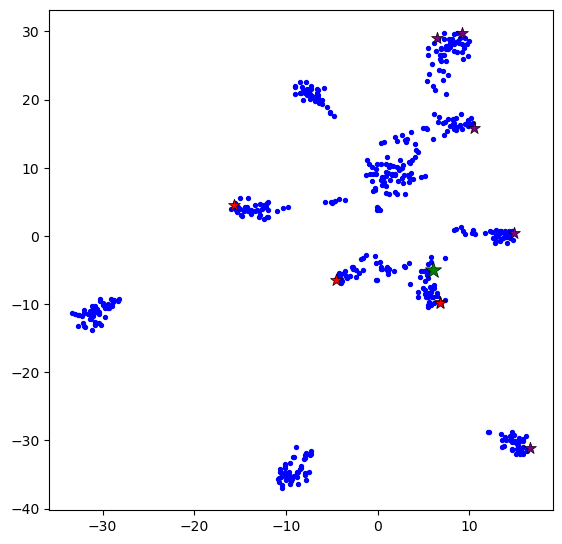

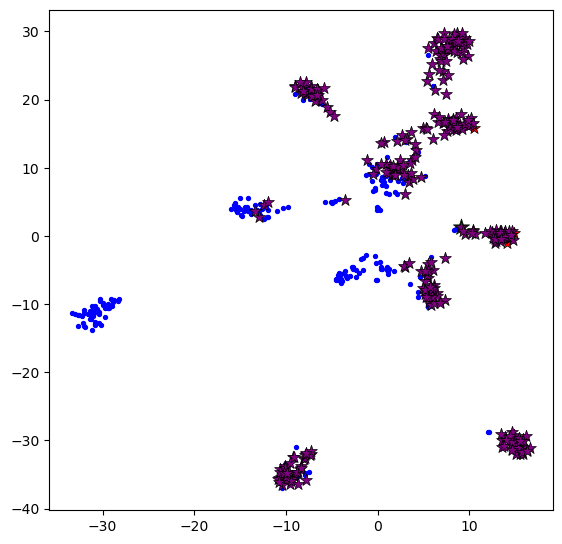

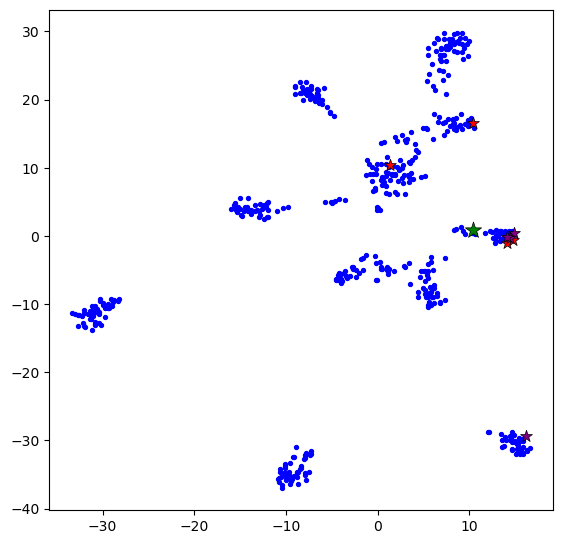

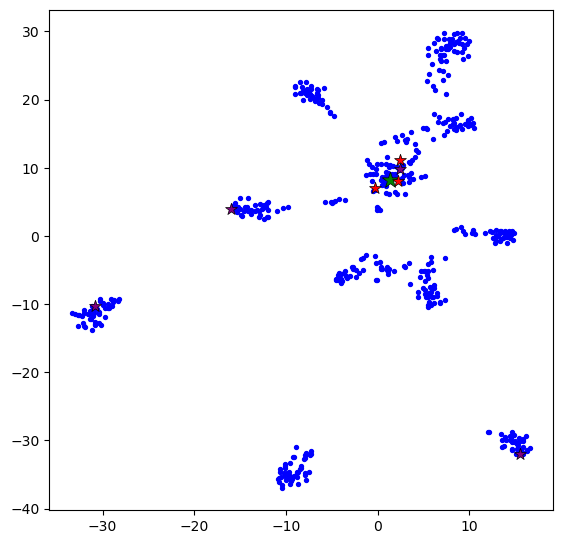

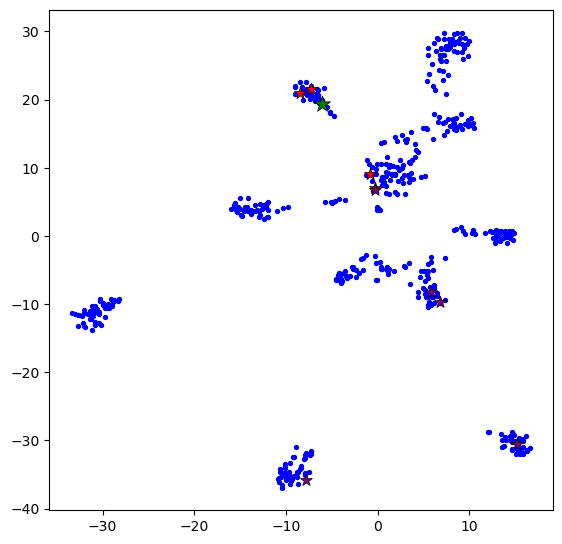

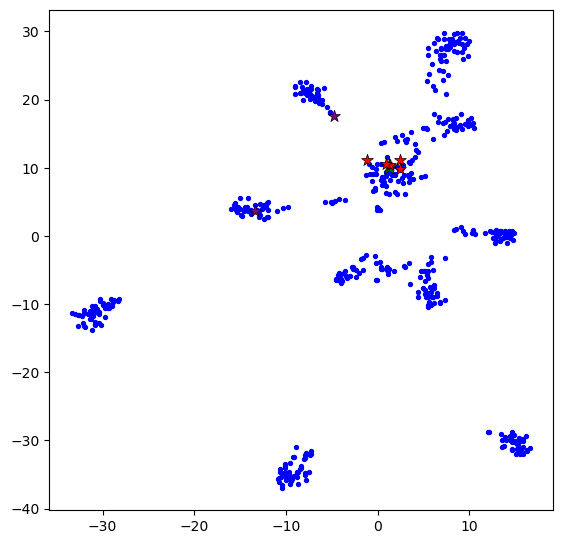

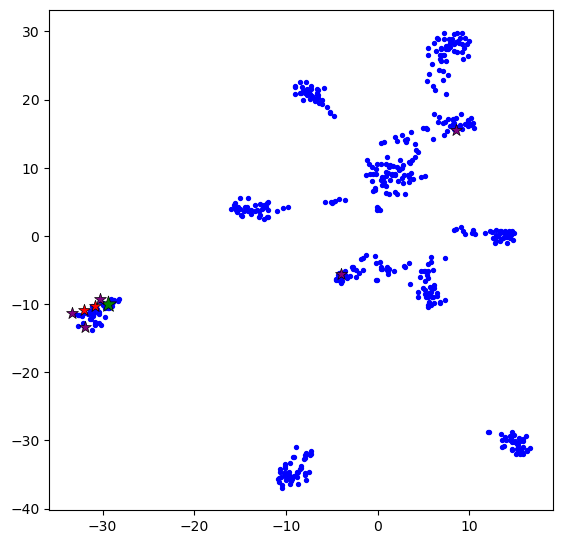

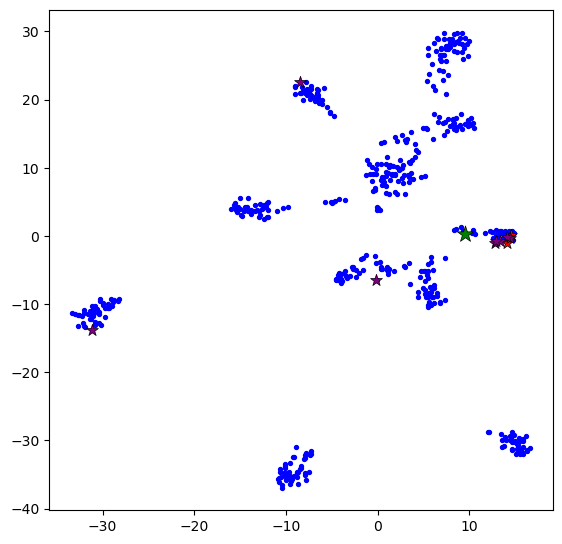

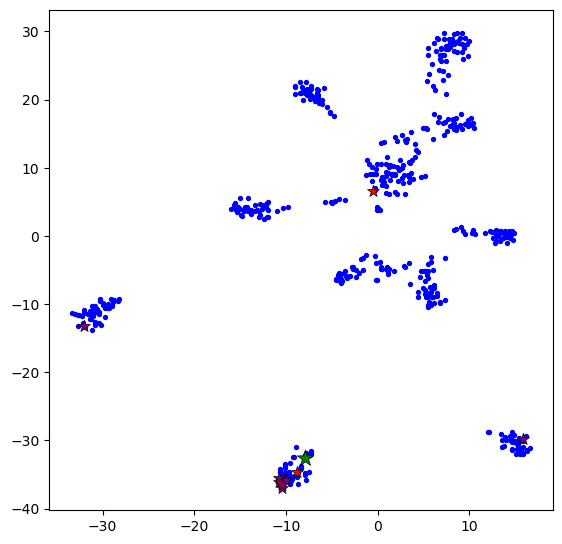

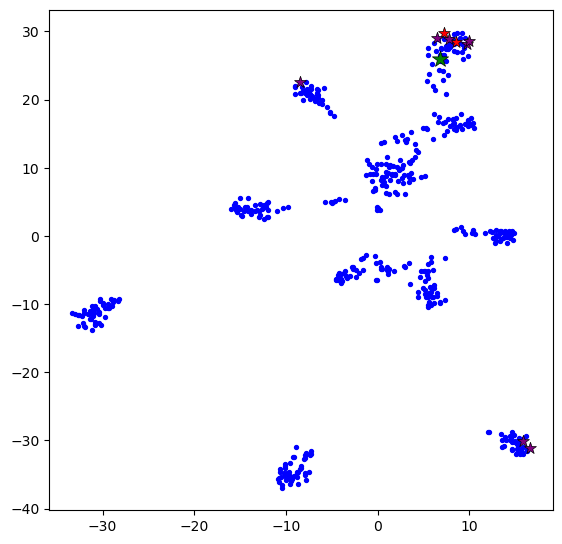

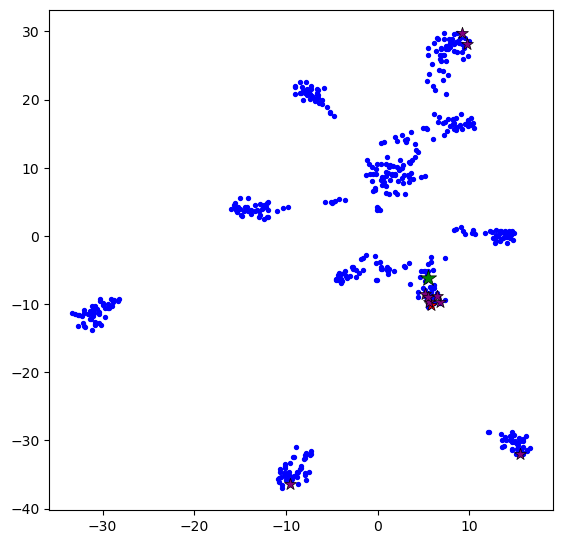

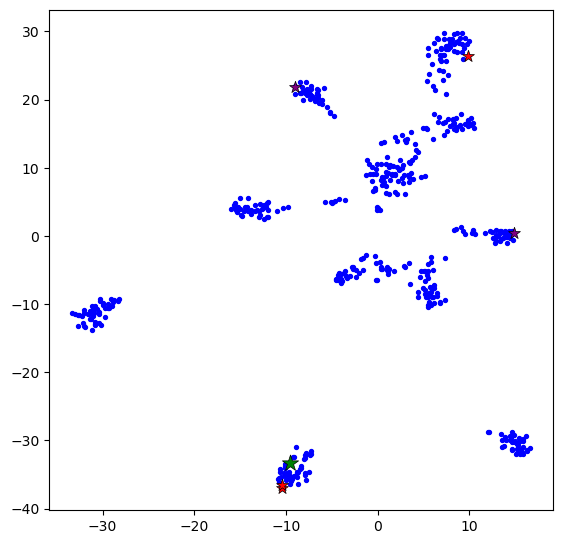

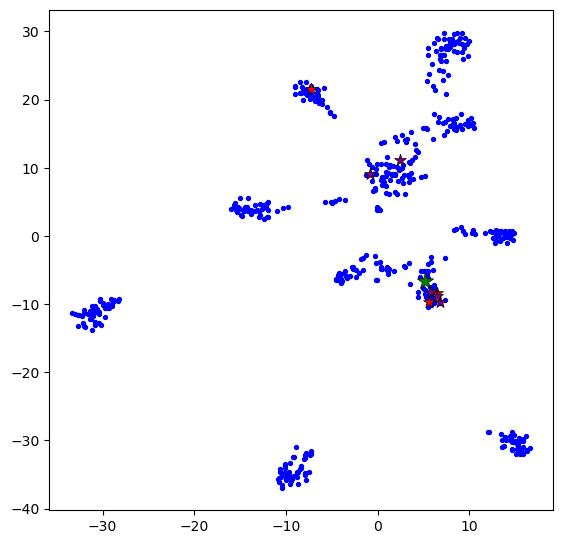

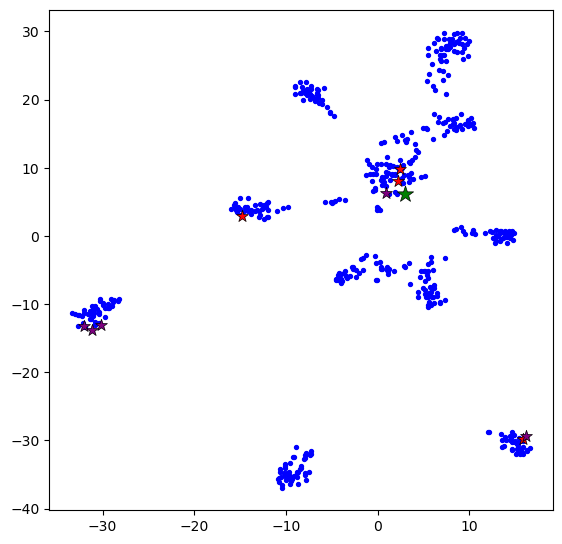

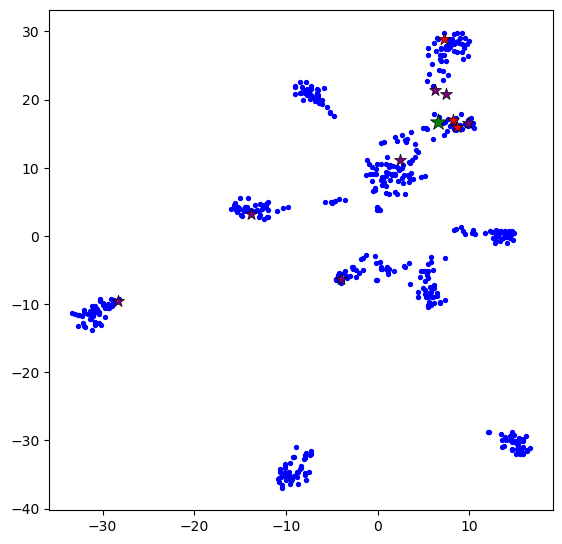

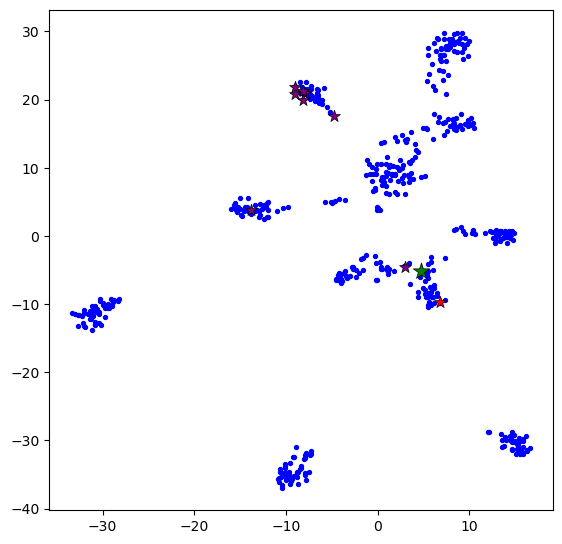

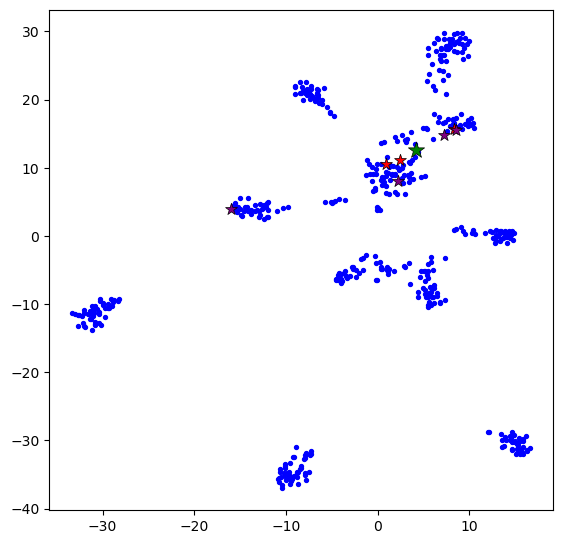

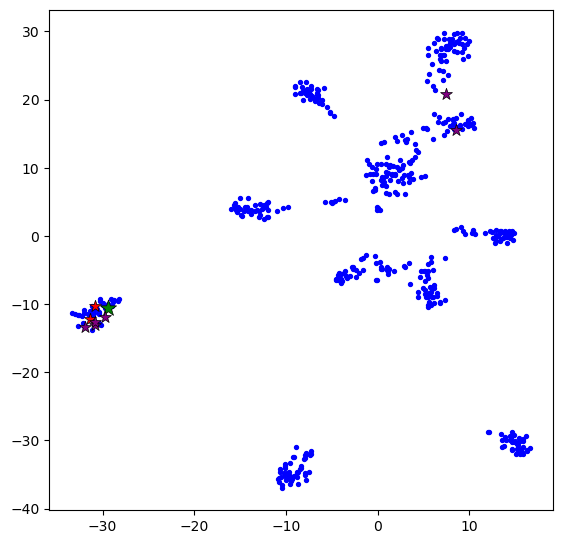

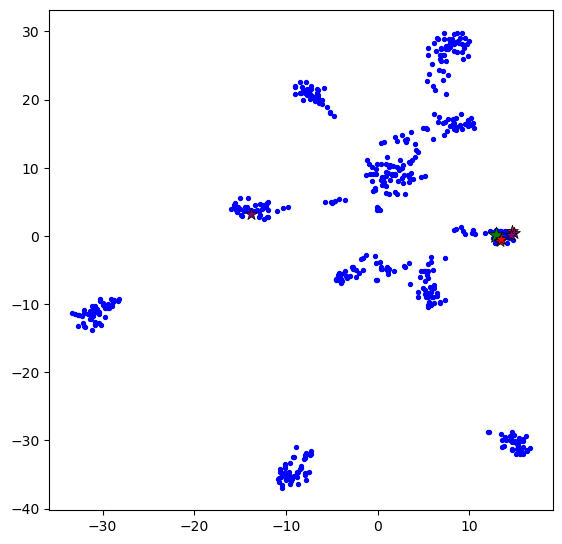

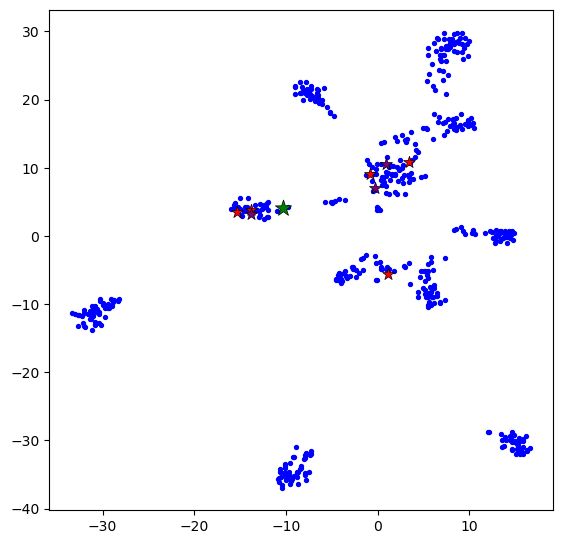

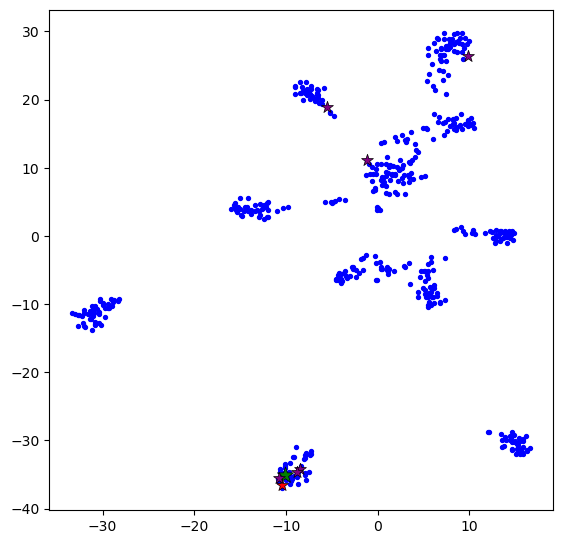

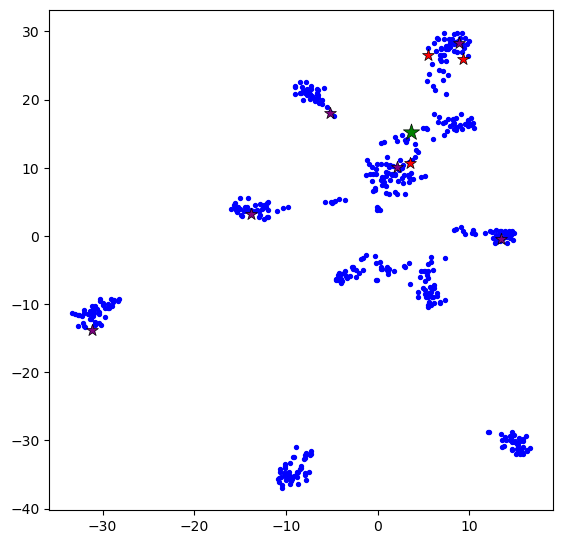

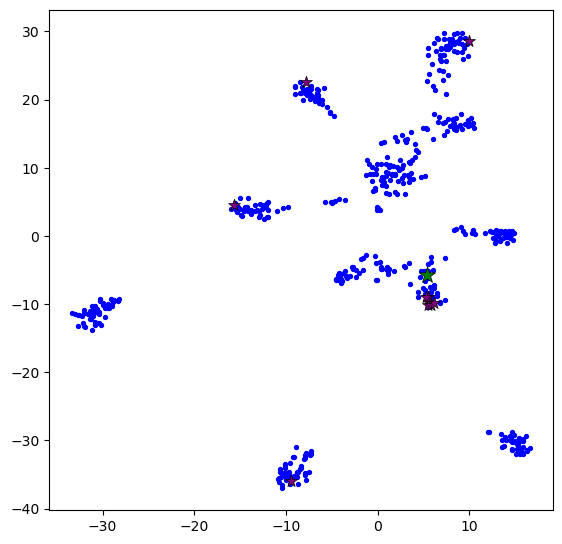

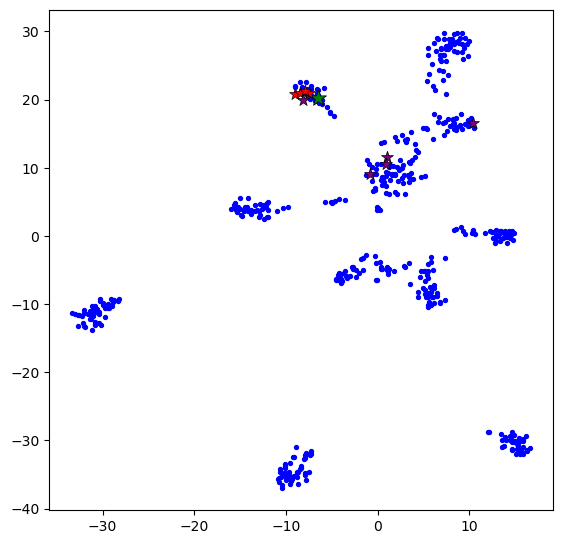

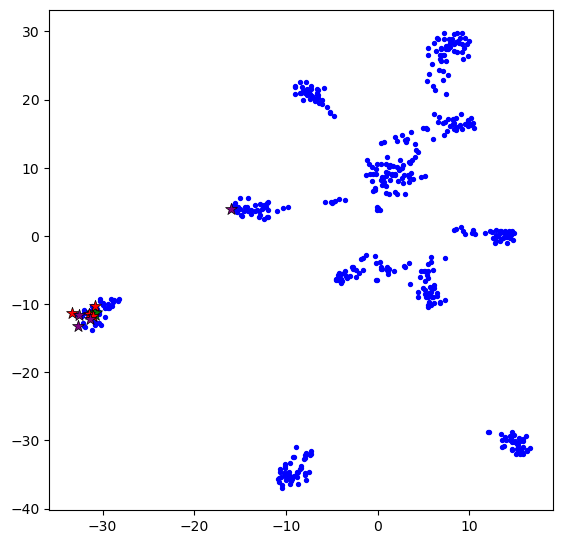

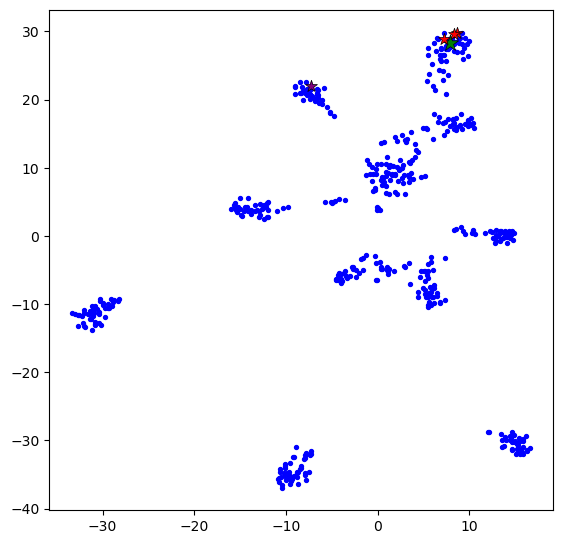

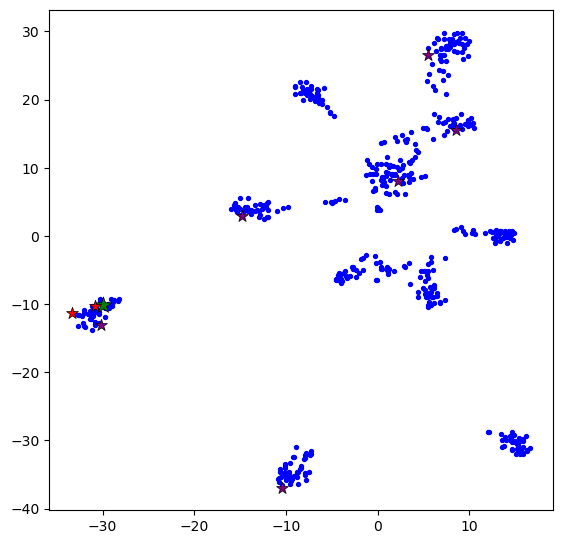

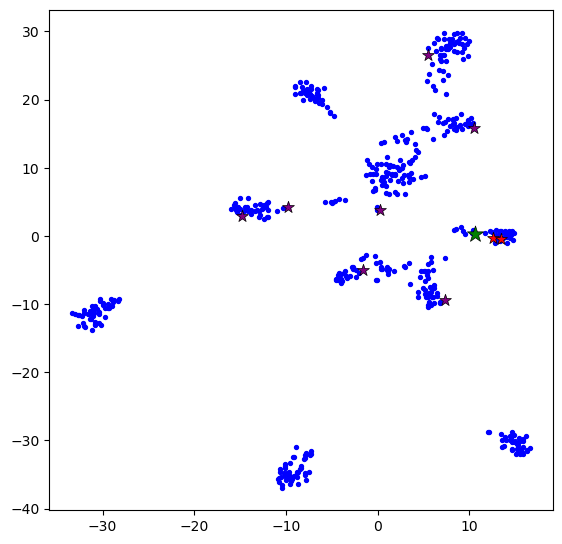

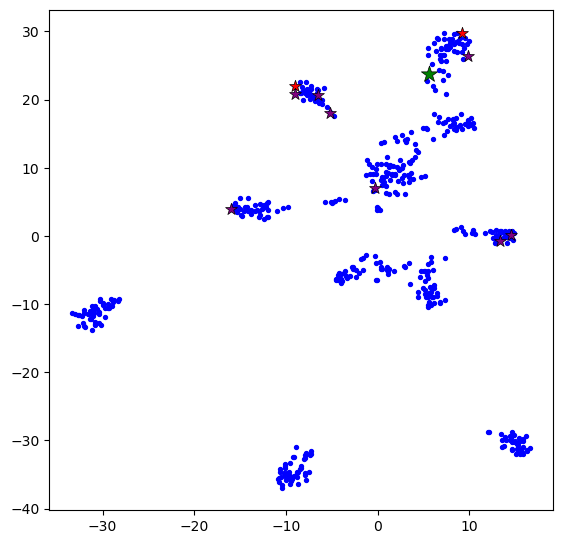

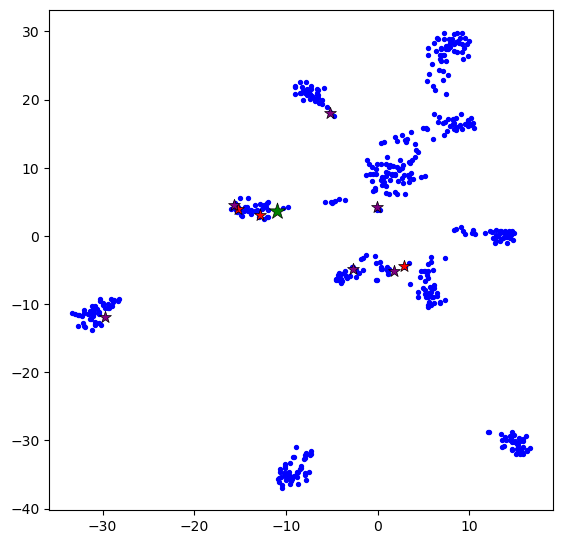

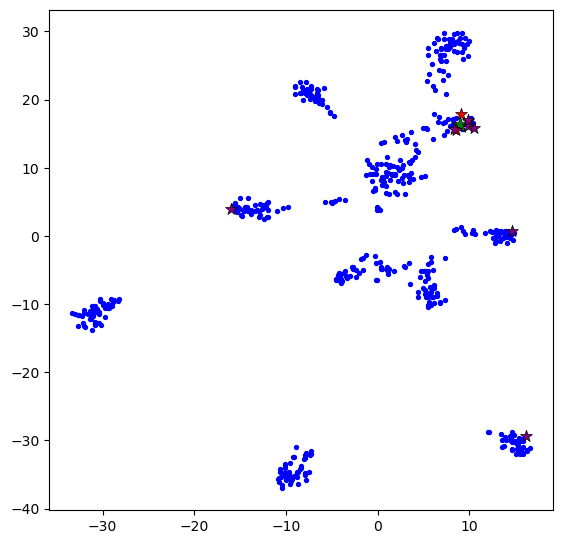

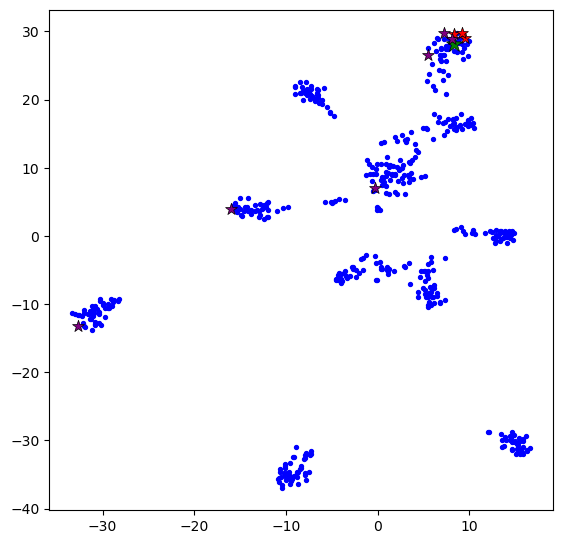

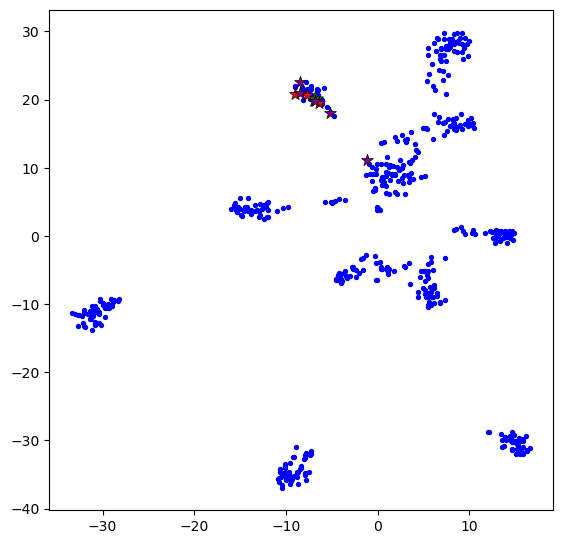

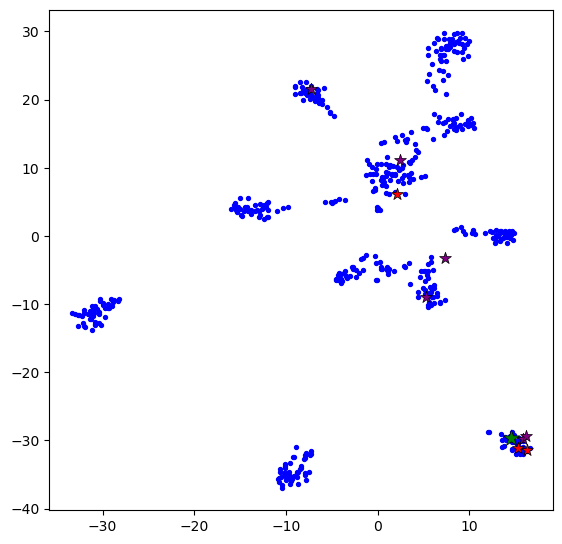

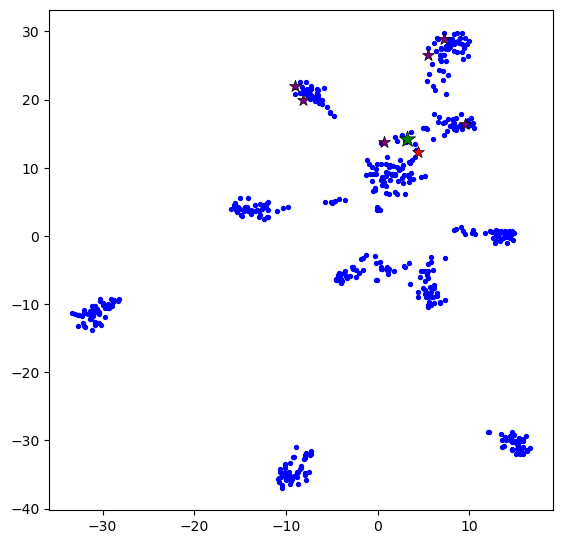

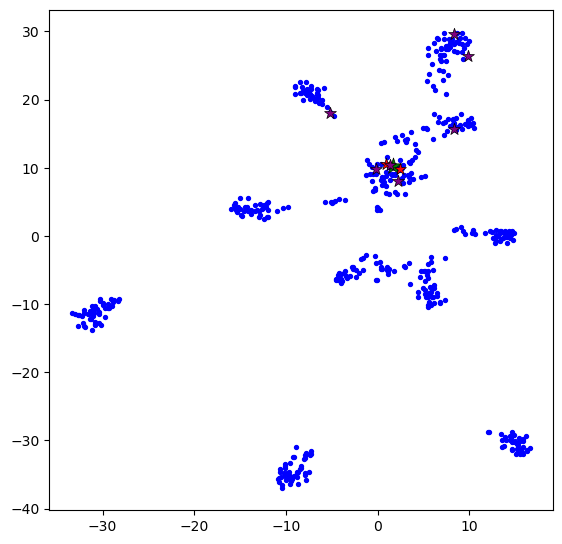

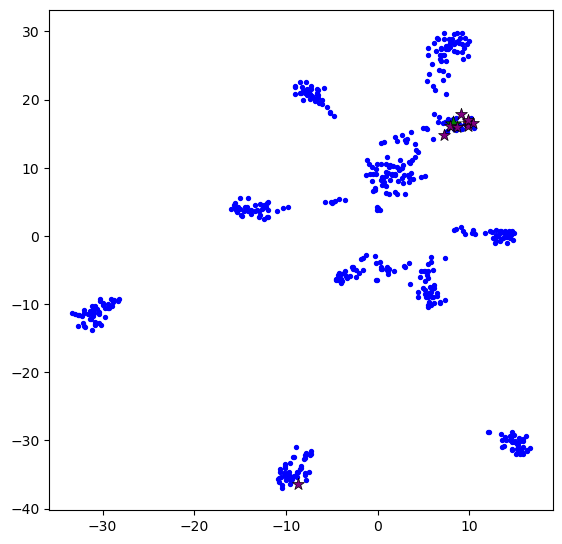

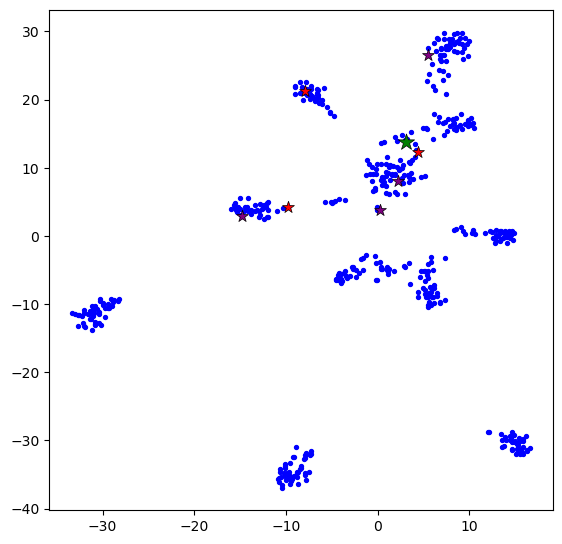

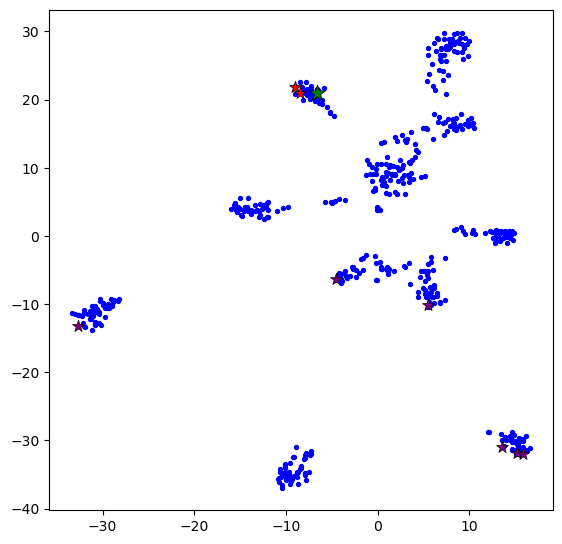

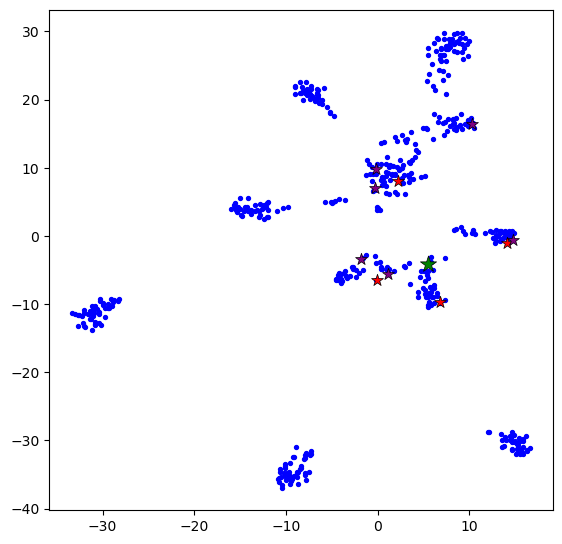

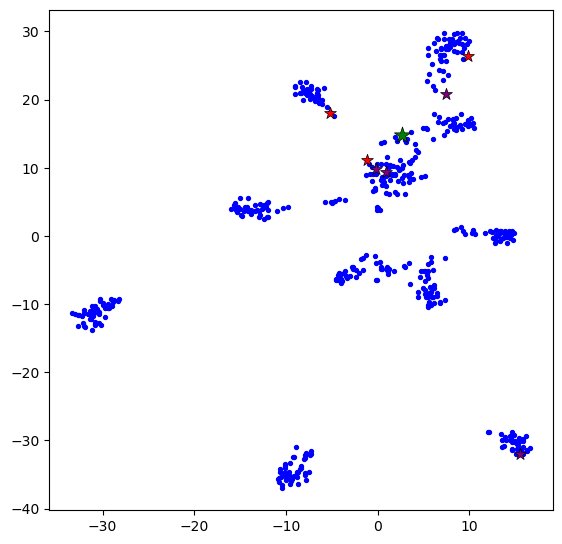

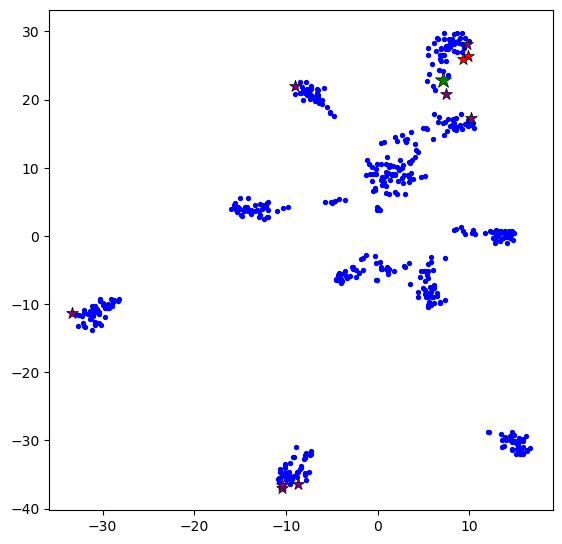

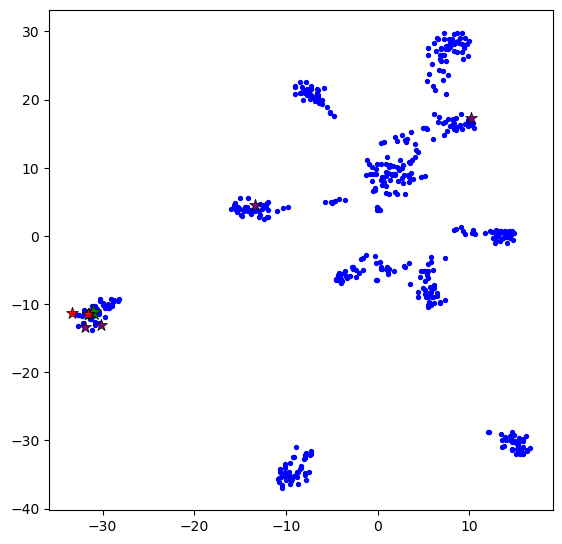

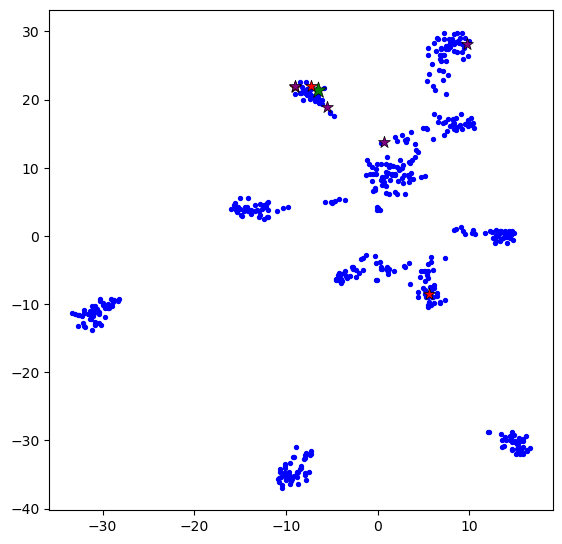

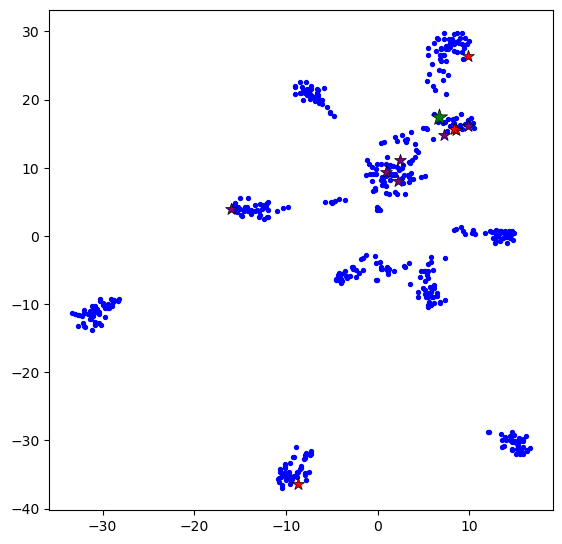

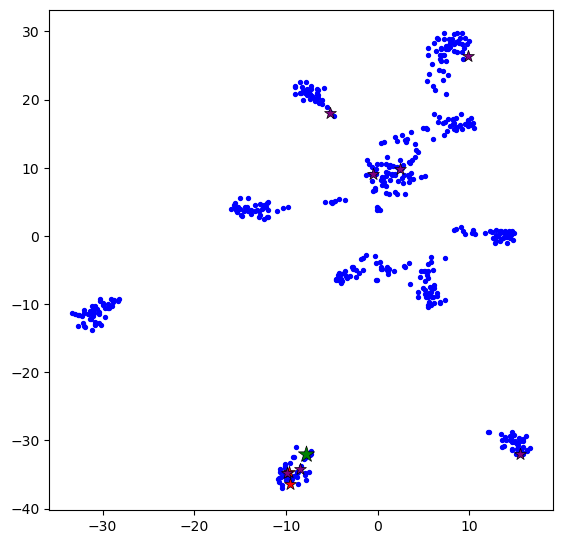

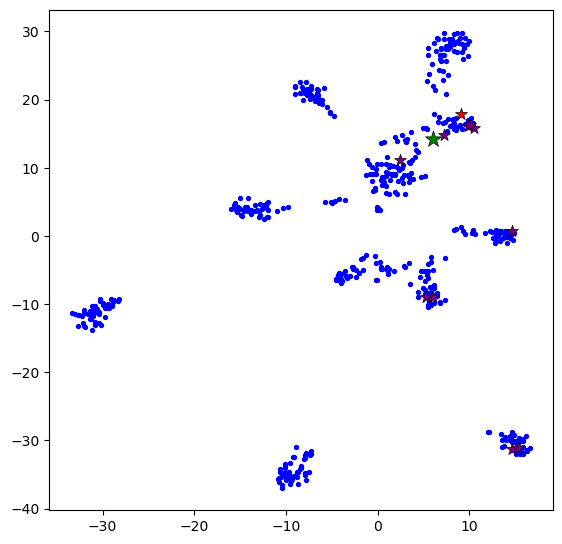

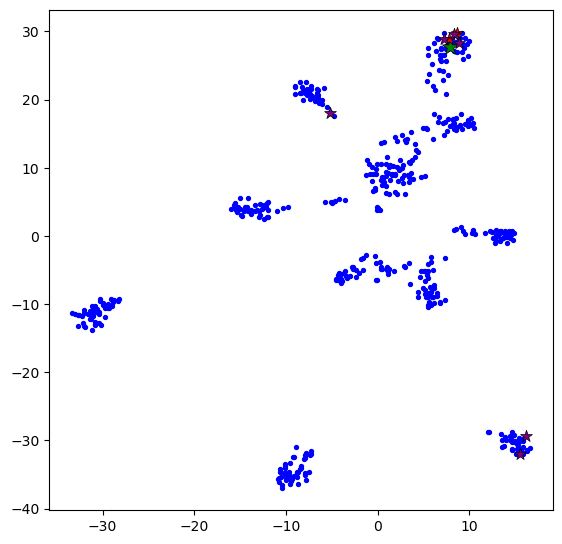

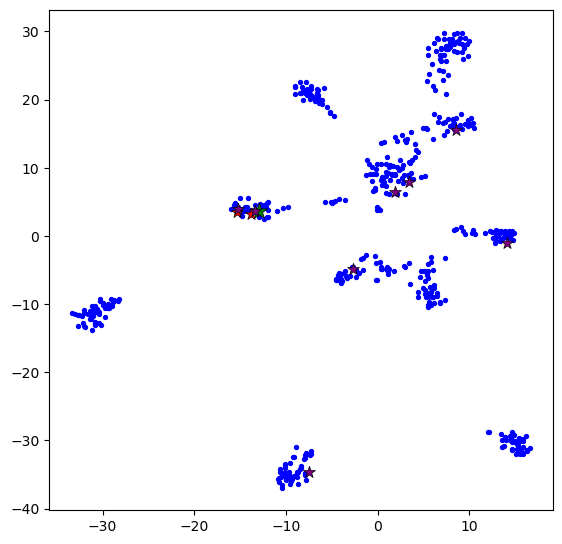

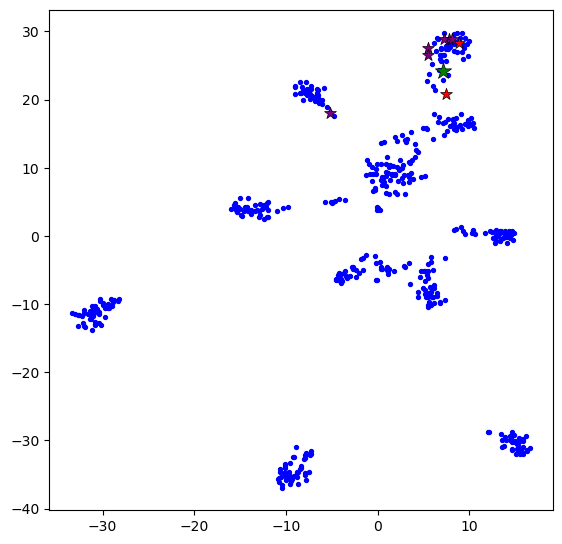

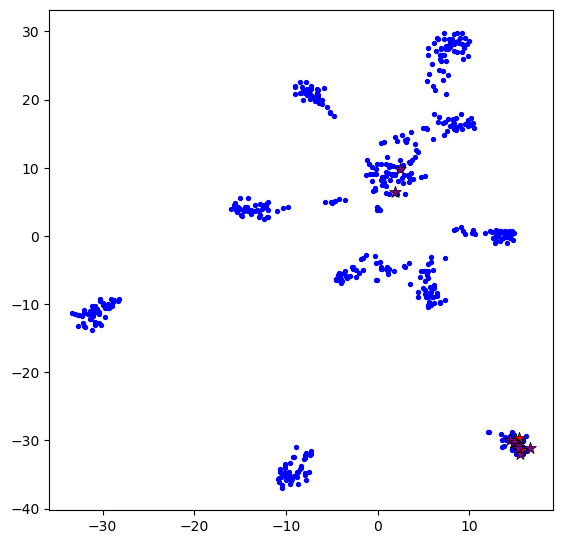

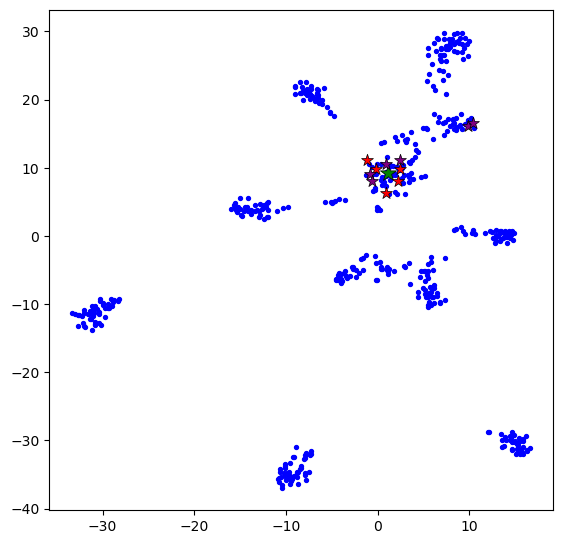

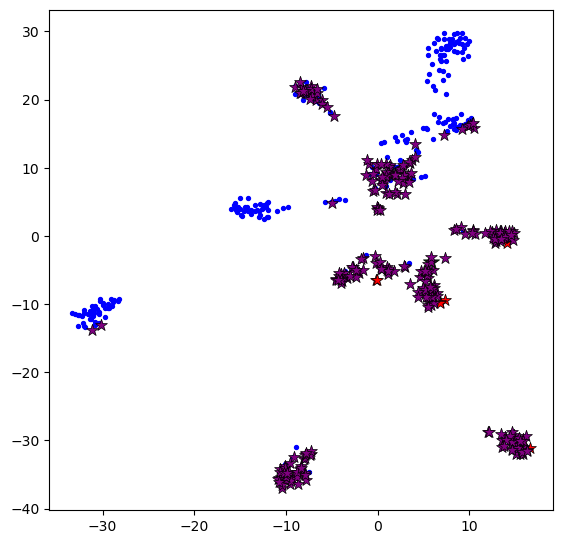

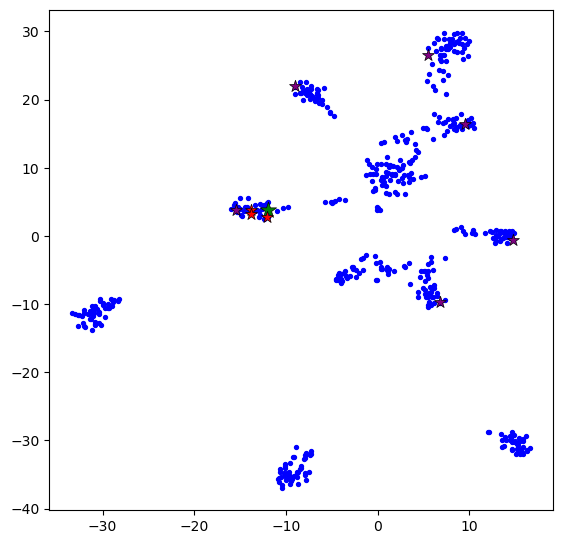

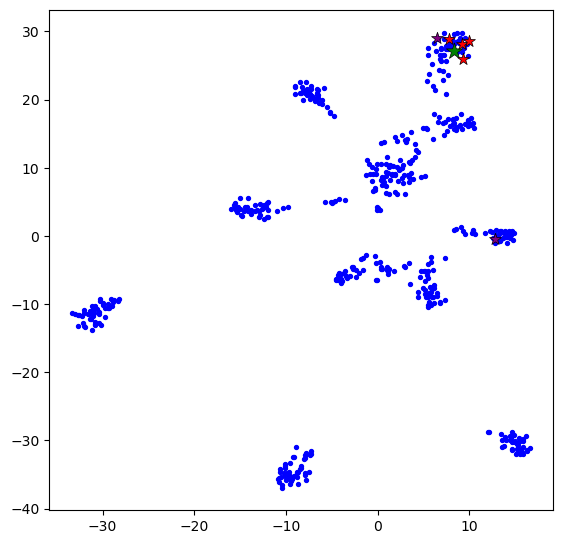

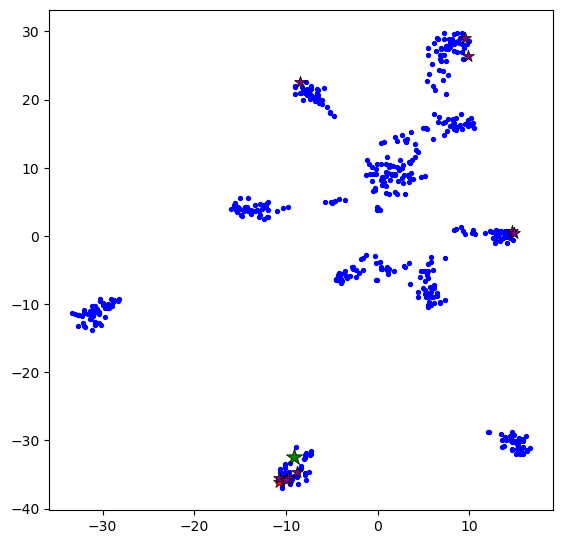

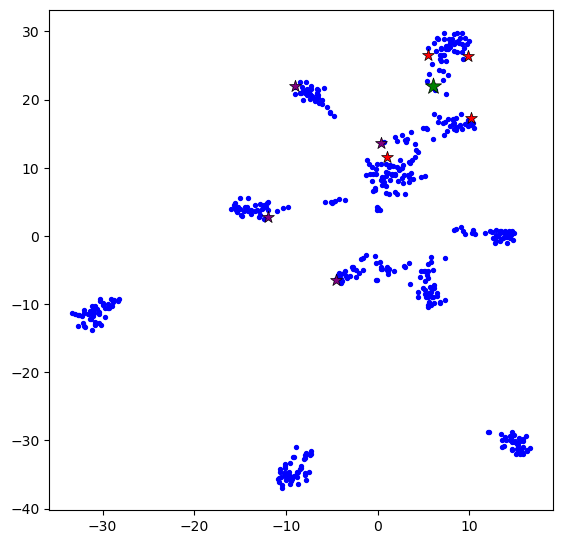

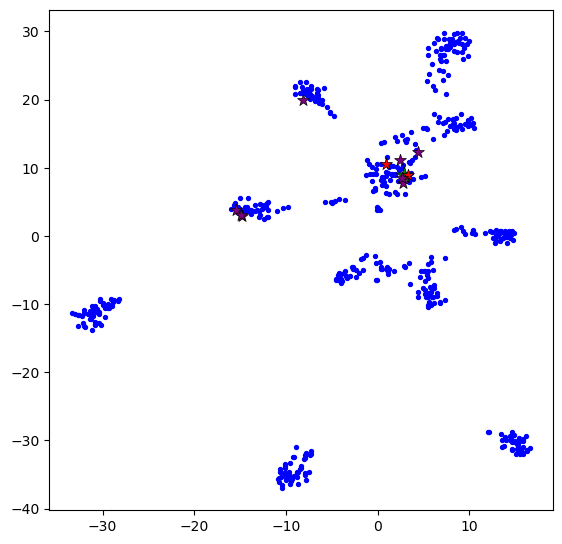

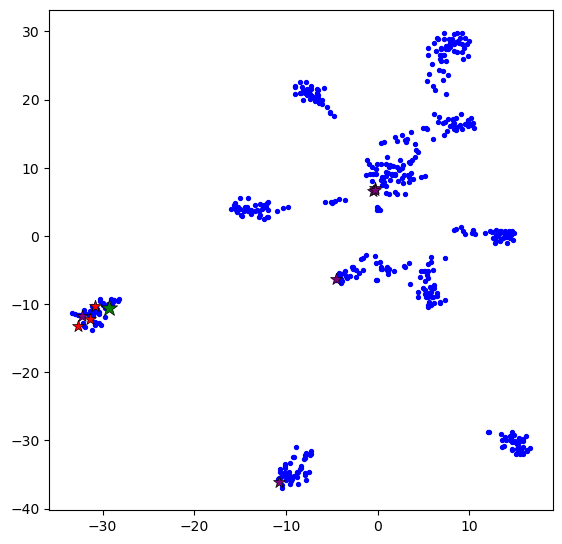

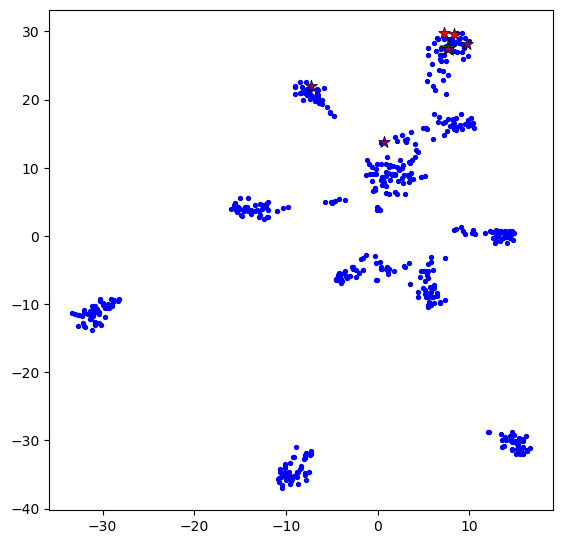

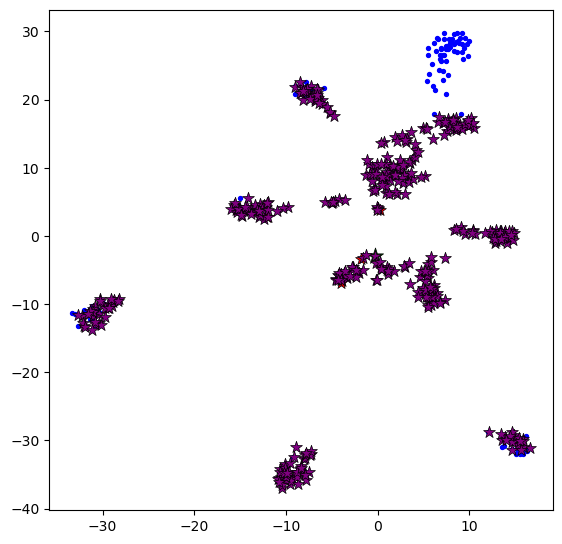

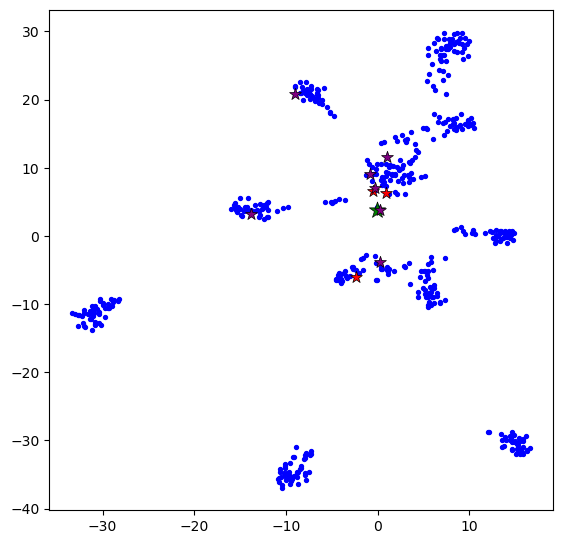

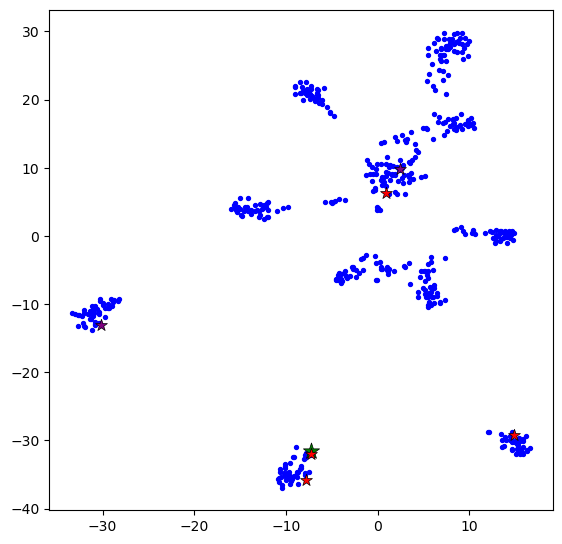

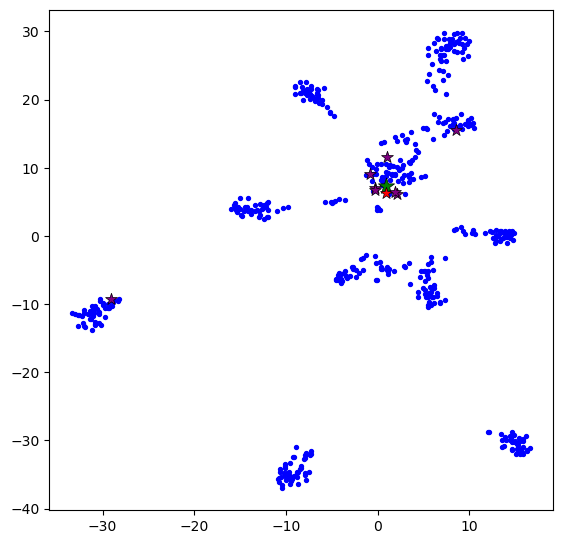

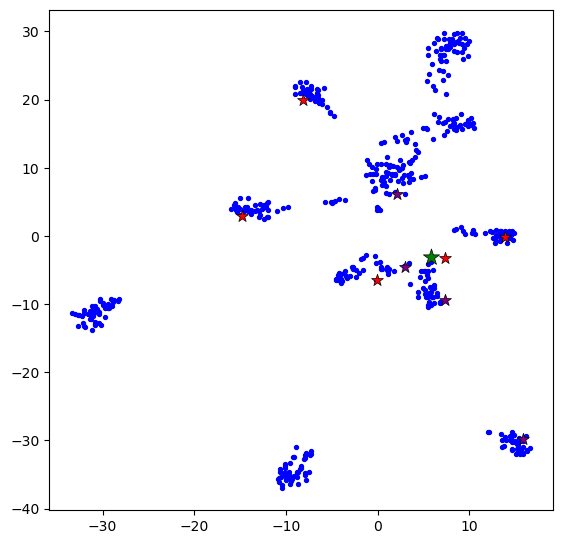

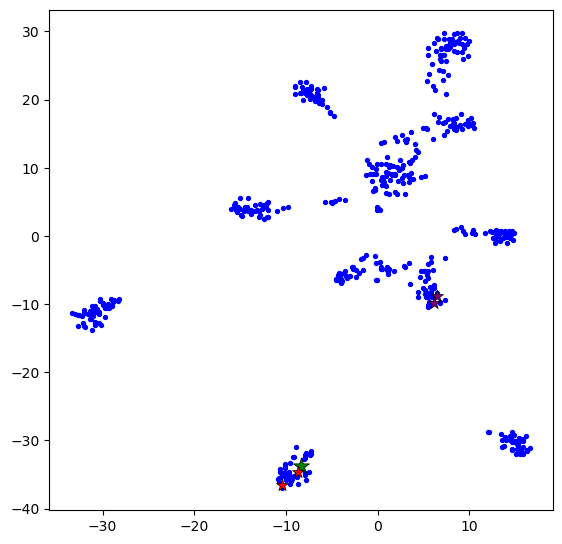

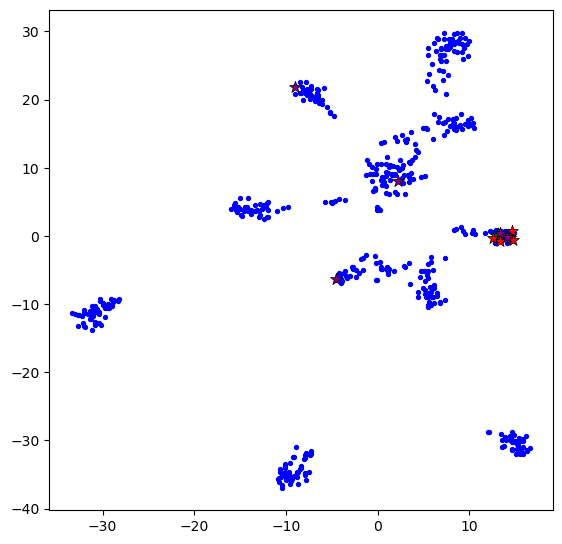

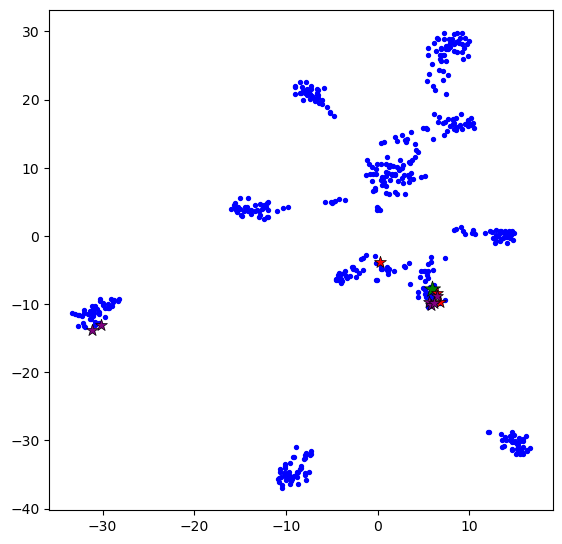

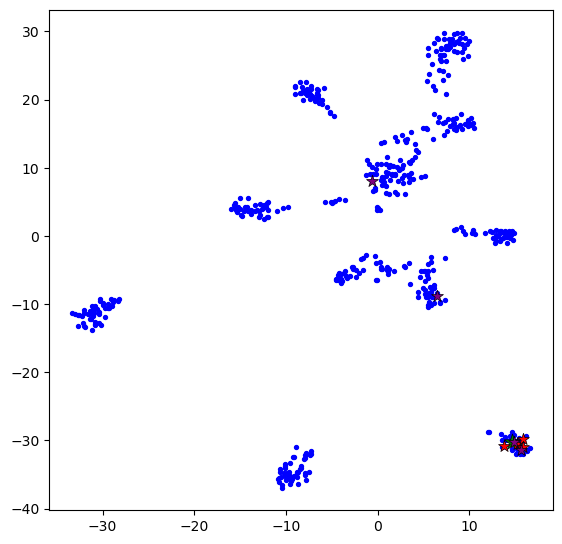

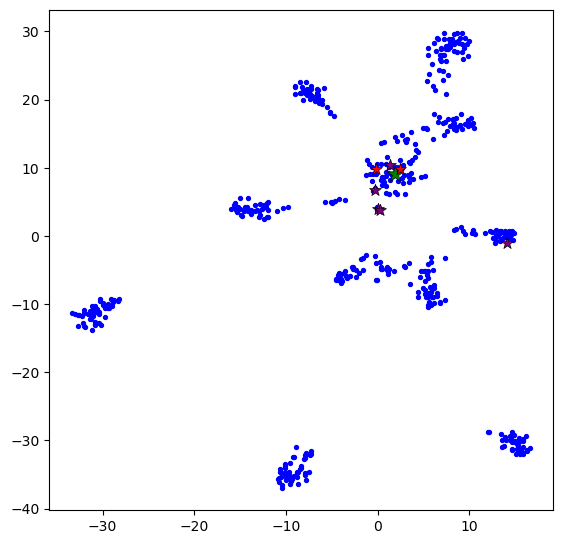

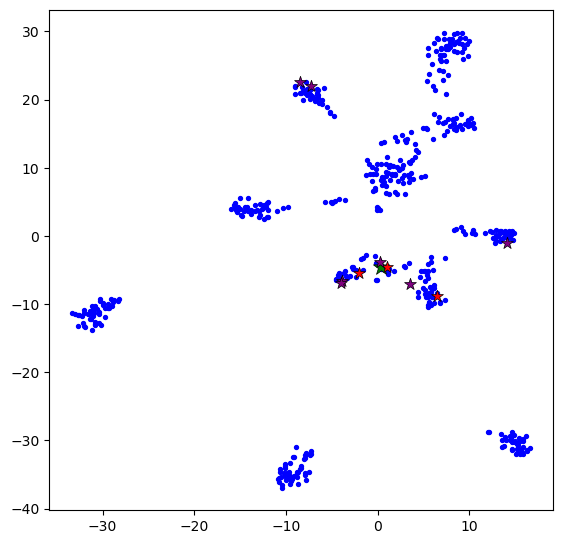

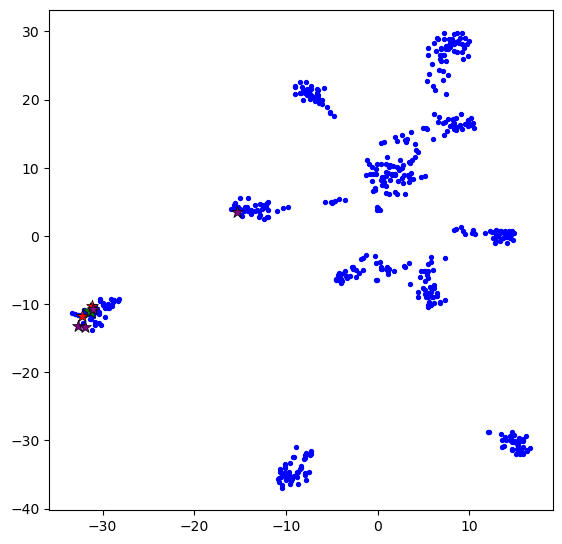

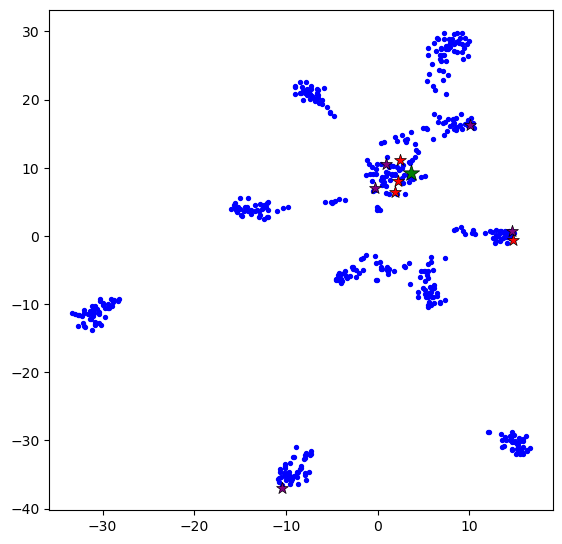

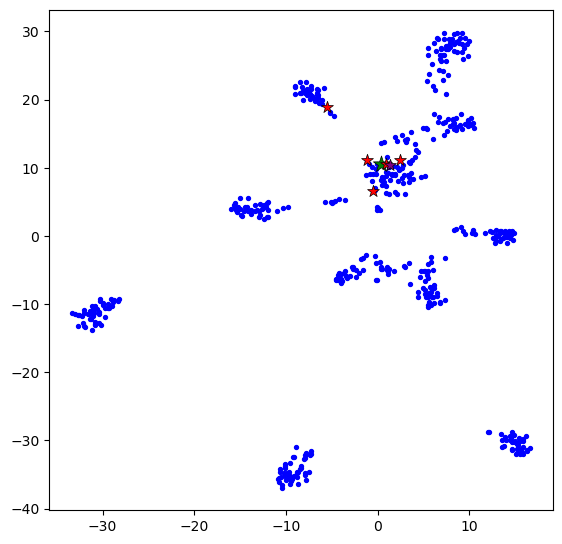

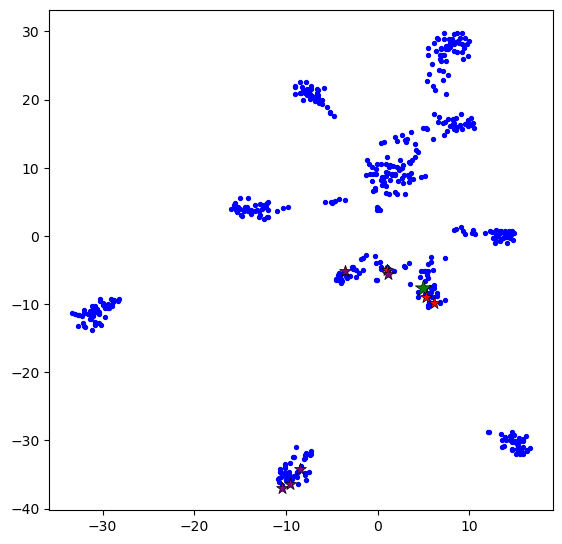

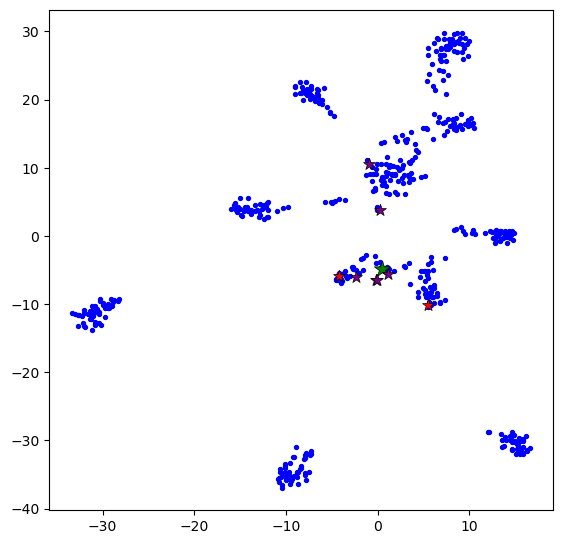

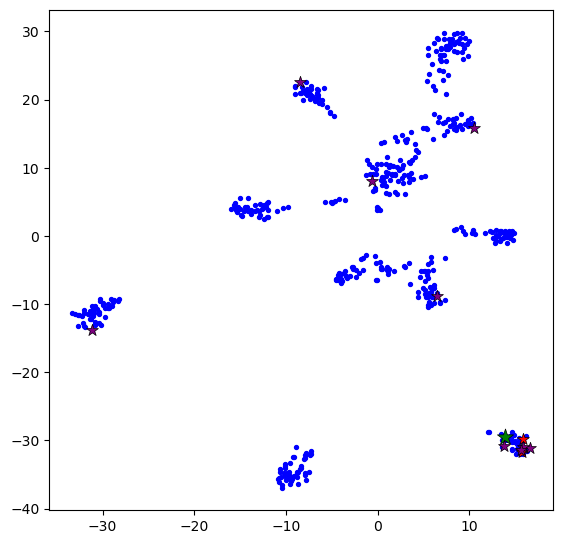

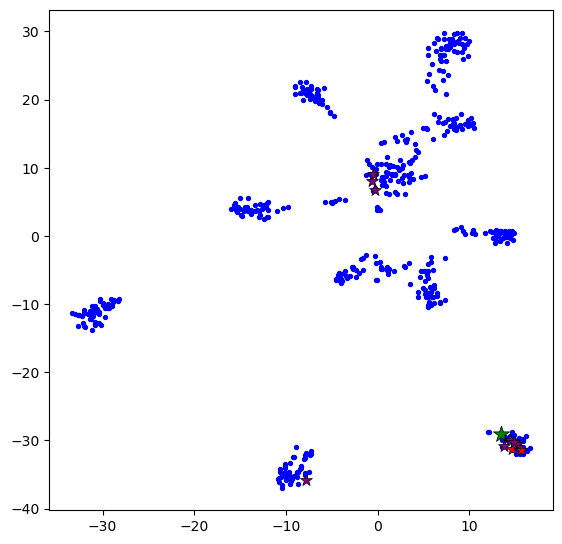

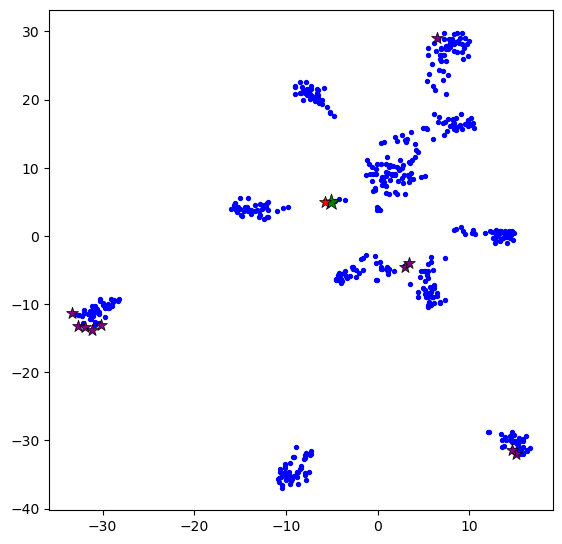

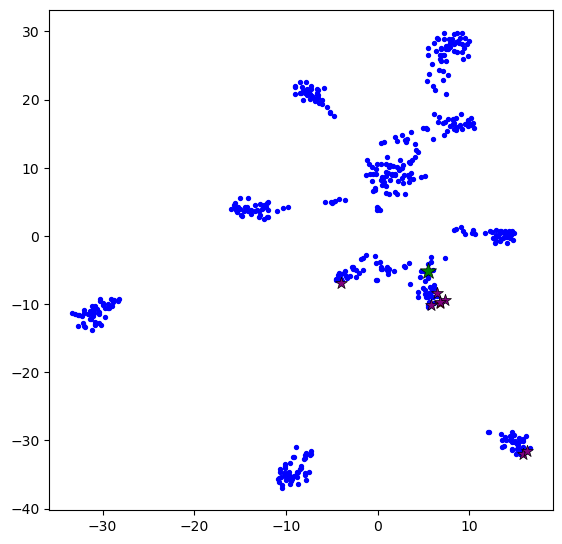

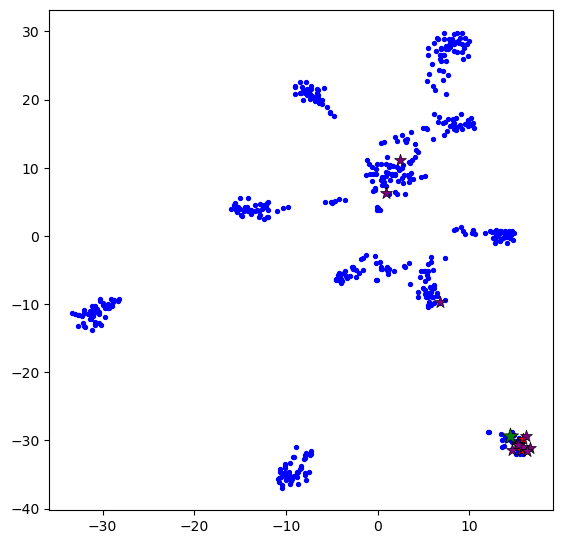

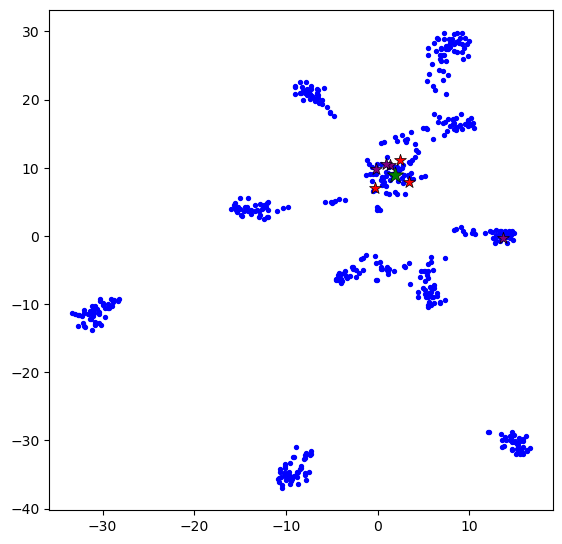

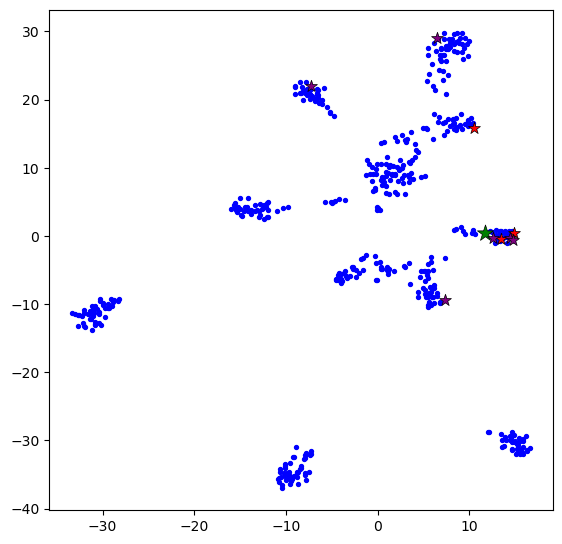

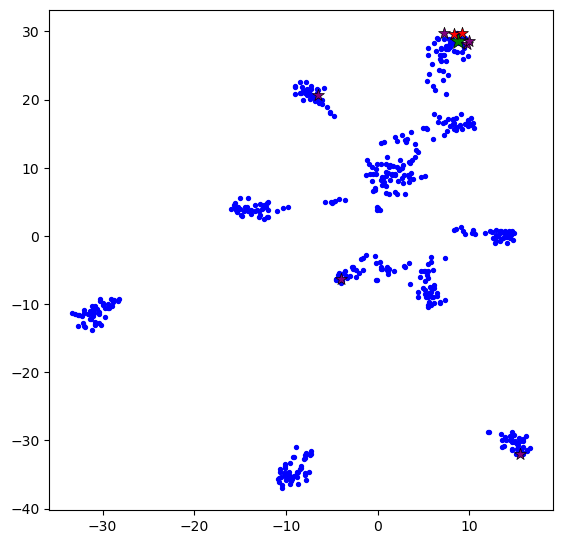

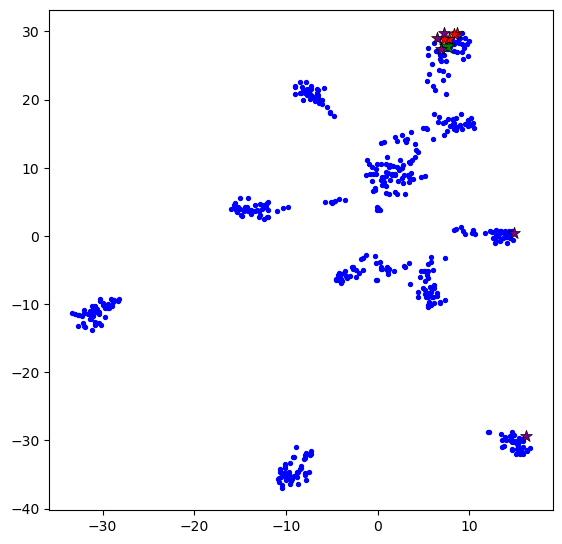

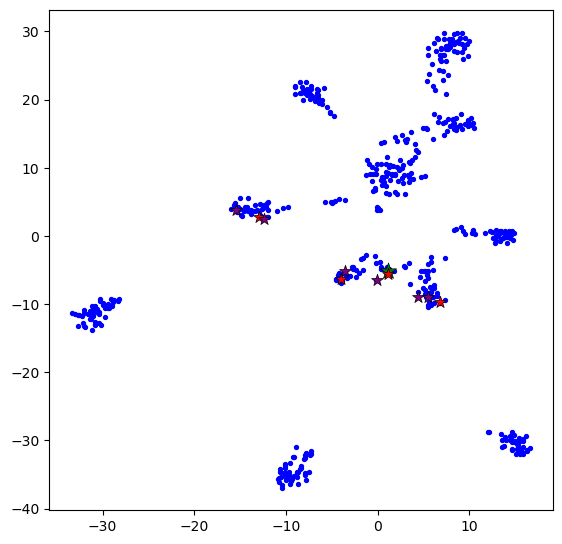

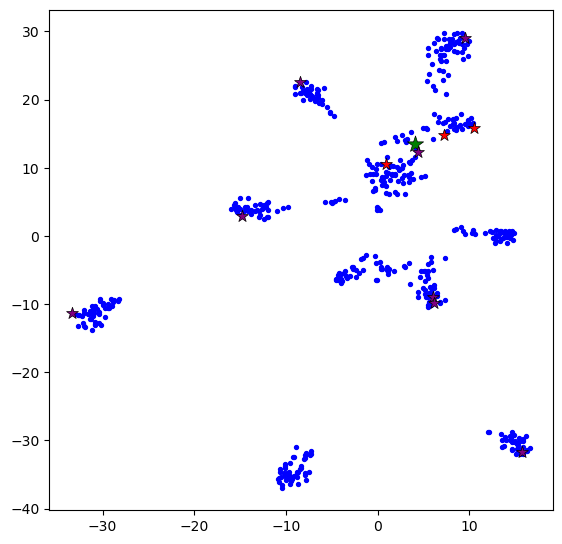

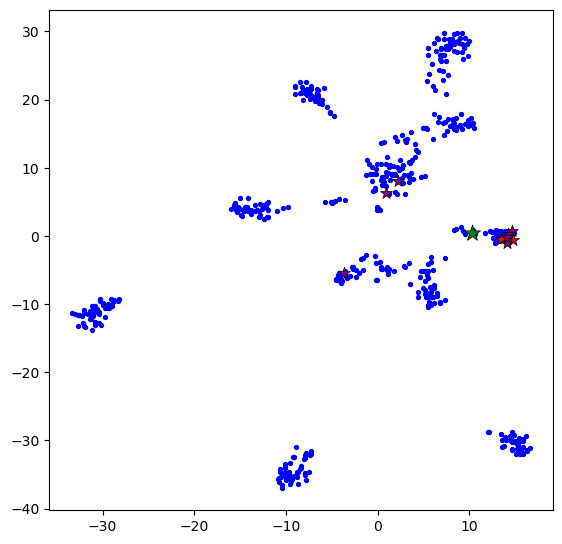

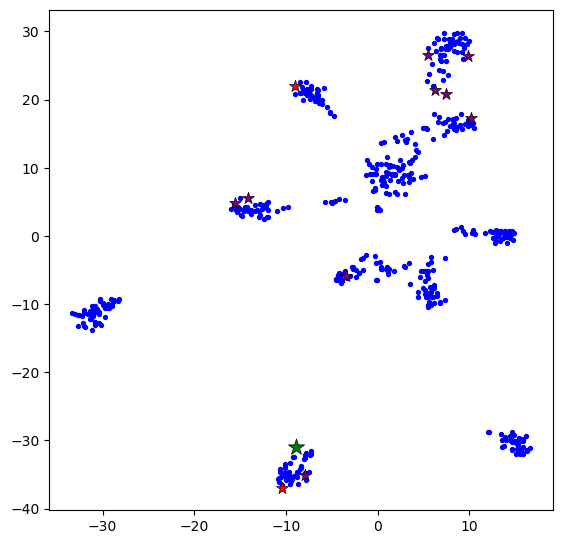

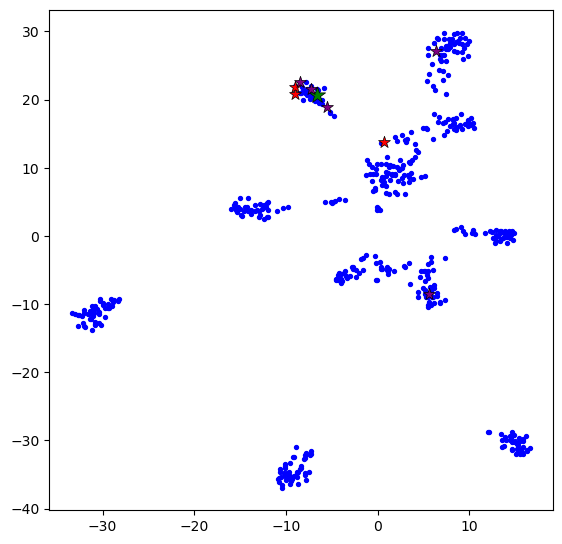

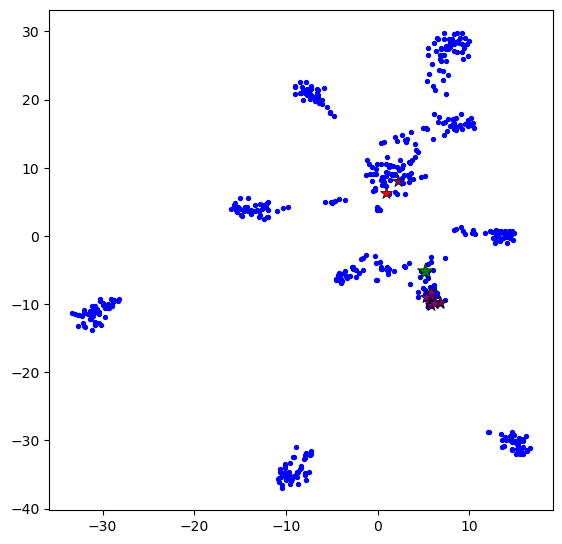

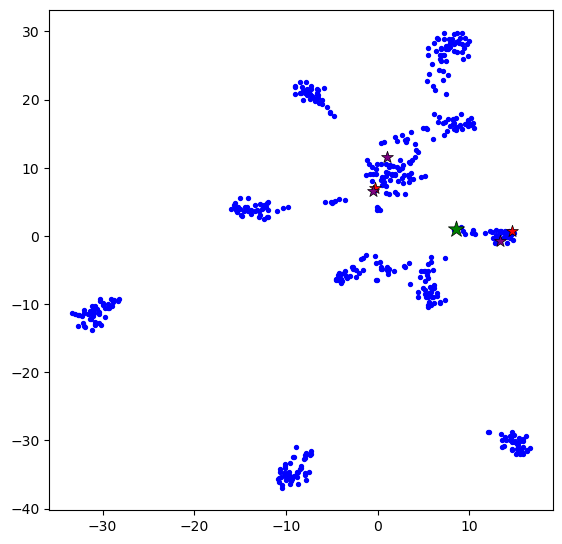

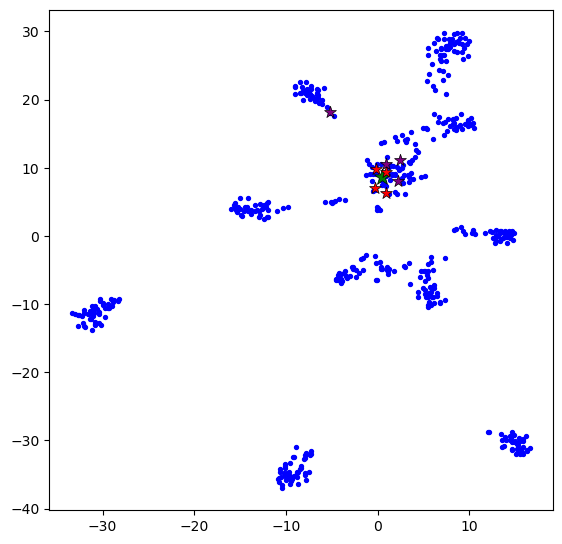

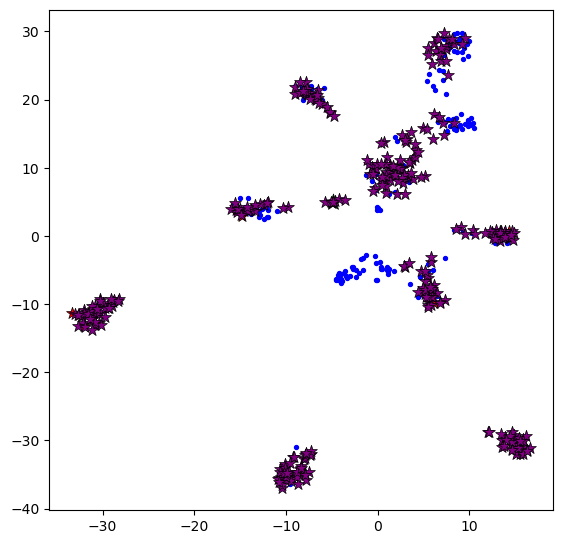

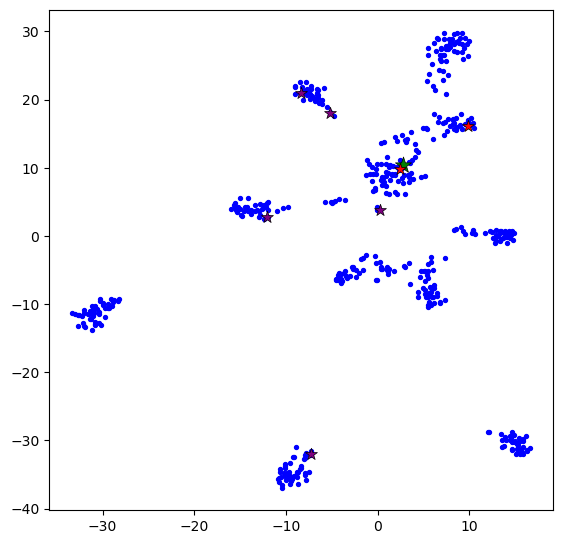

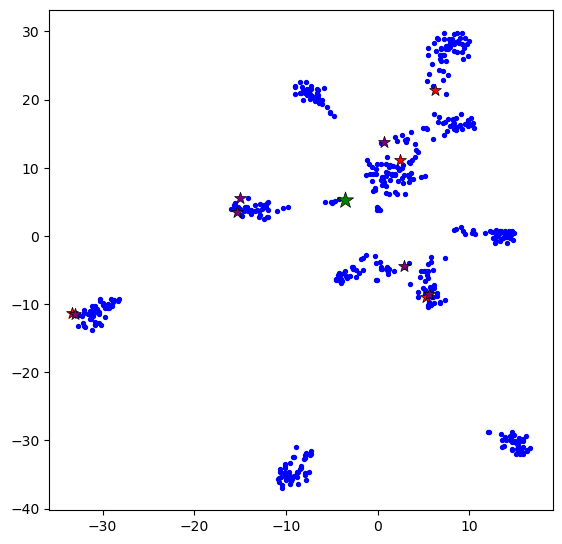

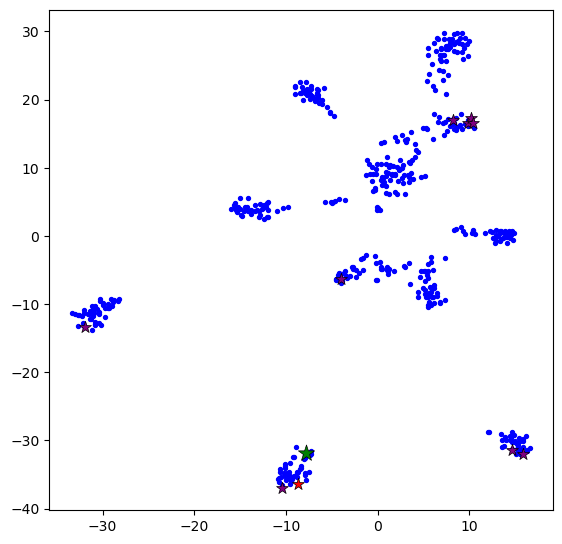

In [104]:
import math
Y=X.T
for i in a:
    y1=Y[:,i]
    y1_hat=np.dot(Y,C)[:,i]
    if np.linalg.norm(y1-y1_hat,ord=2)<0.00001:
        print(i)
        print(np.linalg.norm(y1-y1_hat,ord=2)>0.00001)
def get_index_of_largest_magnitudes(allocation):
    # 创建一个带有索引的元组列表
    indexed_allocation = [(index, value) for index, value in enumerate(allocation)]
    # 找到最大的两个数量级
    max_magnitudes=-100
    submax_magnitudes=-100
    for _, value in indexed_allocation:
        magnitude = 0
        if value != 0:
            magnitude = int(np.floor(np.log10(np.abs(value))))
        if magnitude > max_magnitudes:
            submax_magnitudes=max_magnitudes
            max_magnitudes = magnitude
        elif magnitude > submax_magnitudes and magnitude!=max_magnitudes:
            submax_magnitudes = magnitude
    # 获取最大的两个数量级数字的索引
    max_magnitudes_indices = [index for index, value in indexed_allocation if int(np.floor(np.log10(np.abs(value)))) == max_magnitudes]
    submax_magnitudes_indices = [index for index, value in indexed_allocation if int(np.floor(np.log10(np.abs(value)))) == submax_magnitudes] 
    return max_magnitudes_indices,submax_magnitudes_indices
for i in a:
    allocation=C[:,i]
    result,result1= get_index_of_largest_magnitudes(allocation)
    fig,axes =plt.subplots(1, 1, figsize=(6.5, 6.5))
    axes.scatter(X1[:, 0], X1[:, 1], s=8, color='blue')
    axes.scatter(X1[i, 0], X1[i, 1], s=150, color='green',marker='*', edgecolors='black', linewidth=0.5)
    axes.scatter(X1[result, 0], X1[result, 1], s=80, color='red',marker='*', edgecolors='black', linewidth=0.5)
    axes.scatter(X1[result1, 0], X1[result1, 1], s=80, color='purple',marker='*', edgecolors='black', linewidth=0.5)
    

## result微调

### 1. 看起来很近的两个被选择的样本是否冗余，即去掉一个后，另一个能够很好地被覆盖，整体的cost变化也不大。

[262 259 186 265 147  62 362 355 231 272 281 299 284  19 469]
365.26823911116253
0.02856250851794028
[1, 1, 4, 1, 1, 4, 0, 2, 1, 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[440, 495, 316, 480, 365, 355, 281, 158, 462, 382, 193, 390, 231, 265, 200, 244, 138, 455, 277, 337, 218, 339, 89, 85, 343, 369, 175, 499, 67, 126, 289, 306, 326, 177, 232, 132, 167, 354, 430, 395, 84, 460, 387, 401, 477, 29, 23, 141, 172, 149]


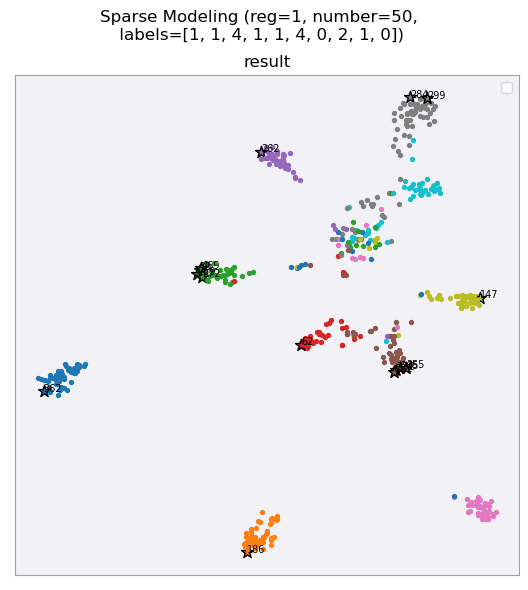

In [120]:
C= np.load('C.npy')
test_num=15
result=FindMinByC(C,test_num/500,np.inf)
print(result)
loss=100*np.linalg.norm(C,ord=np.inf)+0.5*np.linalg.norm(X.T-np.dot(X.T,C),ord='fro')
print(loss)
target=np.linalg.norm(X.T-np.dot(X.T,C),ord='fro')
print(target)
labels = [0] * 10
for index in result:
    labels[train_labels[index]] += 1
print(labels)
fig, axes = plt.subplots(1, 1, figsize=(6.5, 6.5))
# Plot result on the subplot
SAMple=simple_scatterplot(axes, X, train_labels[:1000], result)
print(SAMple)

axes.set_title('result')
# Set the title
fig.suptitle(f'Sparse Modeling (reg={1}, number={int(0.1*500)},\n labels={labels})')
plt.show()
np.save('result.npy',result)

### 删除点

In [6]:
result=np.load('result.npy')
green=[469,259,19,272]
C_=calculate_C(X.T,result)
target1=np.linalg.norm(X.T-np.dot(X.T,C_),ord='fro')
for i in green:
    result1=[x for x in result if x!=i]
    C1=calculate_C(X.T,result1)      
    target2=np.linalg.norm(X.T-np.dot(X.T,C1),ord='fro')
    print(target1,'after',target2)
brown=[231,265,355,281]
for i in brown:
    result1=[x for x in result if x!=i]
    C1=calculate_C(X.T,result1)      
    target2=np.linalg.norm(X.T-np.dot(X.T,C1),ord='fro')
    print(target1,'after',target2)

0.00017632895592995372 after 0.00017281357259069677
0.00017632895592995372 after 0.00020741882136011885
0.00017632895592995372 after 0.00042150429704961994
0.00017632895592995372 after 0.00017708274723844263
0.00017632895592995372 after 0.00024304095810536987
0.00017632895592995372 after 0.00032979971767818785
0.00017632895592995372 after 0.00024500855888565315
0.00017632895592995372 after 0.0009307001213714419
